## NAIS data

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the dataset
file_path = '/home/coliewo/Desktop/analysis/combined_test1.nc'
data = xr.open_dataset(file_path)

#To convert the diameter values to nm
dataset = data.assign_coords(diameter=data['diameter'] * 1e9)

In [2]:
dataset

<xarray.Dataset>
Dimensions:             (diameter: 55, time: 1081, flag: 83)
Coordinates:
  * diameter            (diameter) float64 0.8029 0.8628 0.9273 ... 38.46 41.55
  * time                (time) datetime64[ns] 2024-05-16 ... 2024-06-30
  * flag                (flag) object '+ postfilter voltage may be too high' ...
Data variables:
    neg_ions            (time, diameter) float64 ...
    pos_ions            (time, diameter) float64 ...
    neg_particles       (time, diameter) float64 ...
    pos_particles       (time, diameter) float64 ...
    neg_ion_flags       (time, flag) int64 ...
    pos_ion_flags       (time, flag) int64 ...
    neg_particle_flags  (time, flag) int64 ...
    pos_particle_flags  (time, flag) int64 ...
Attributes: (12/14)
    measurement_location:            ISAC
    description:                     Rooftop Industrial Area
    longitude:                       11.34
    latitude:                        44.52
    inlet_length:                    1.0
    do_inlet_loss_correction:        True
    ...                              ...
    remove_corona_ions:              True
    fill_temperature:                273.15
    fill_pressure:                   101325.0
    fill_flowrate:                   54.0
    dilution_on:                     False
    resolution:                      5min

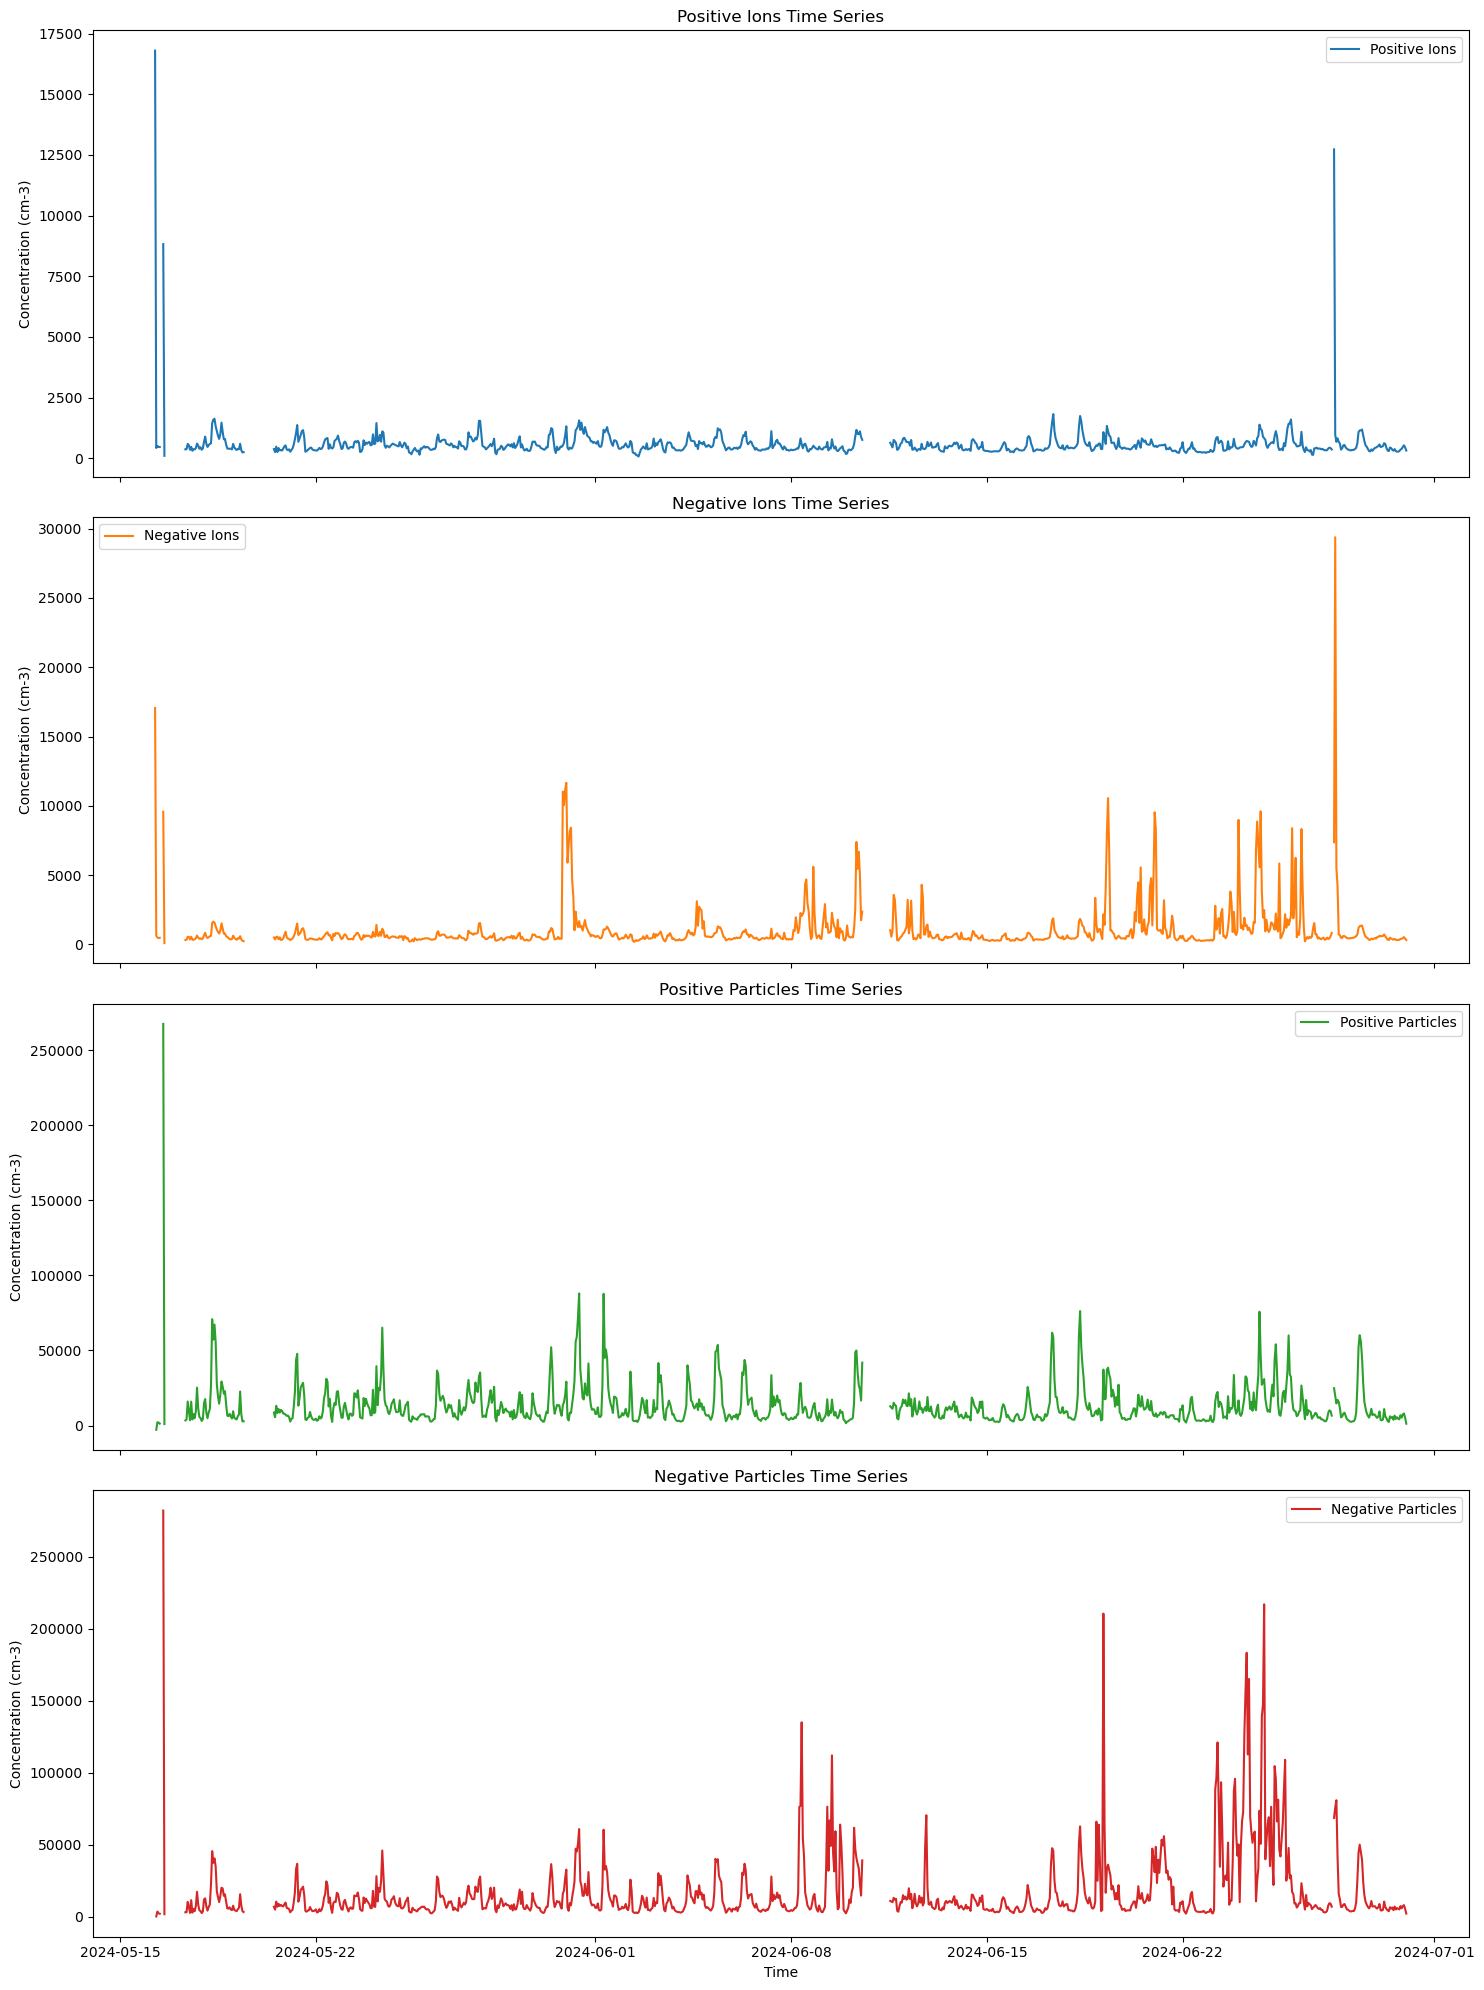

In [3]:
# Step 1: Visualize the Data

# 1.1 Time Series Plots
fig, axs = plt.subplots(4, 1, figsize=(15, 20), sharex=True)

# Positive ions
pos_ions = dataset['pos_ions'].mean(dim='diameter')
axs[0].plot(dataset['time'], pos_ions, label='Positive Ions', color='tab:blue')
axs[0].set_title('Positive Ions Time Series')
axs[0].set_ylabel('Concentration (cm-3)')
axs[0].legend()

# Negative ions
neg_ions = dataset['neg_ions'].mean(dim='diameter')
axs[1].plot(dataset['time'], neg_ions, label='Negative Ions', color='tab:orange')
axs[1].set_title('Negative Ions Time Series')
axs[1].set_ylabel('Concentration (cm-3)')
axs[1].legend()

# Positive particles
pos_particles = dataset['pos_particles'].mean(dim='diameter')
axs[2].plot(dataset['time'], pos_particles, label='Positive Particles', color='tab:green')
axs[2].set_title('Positive Particles Time Series')
axs[2].set_ylabel('Concentration (cm-3)')
axs[2].legend()

# Negative particles
neg_particles = dataset['neg_particles'].mean(dim='diameter')
axs[3].plot(dataset['time'], neg_particles, label='Negative Particles', color='tab:red')
axs[3].set_title('Negative Particles Time Series')
axs[3].set_ylabel('Concentration (cm-3)')
axs[3].set_xlabel('Time')
axs[3].legend()

plt.tight_layout()
plt.show()

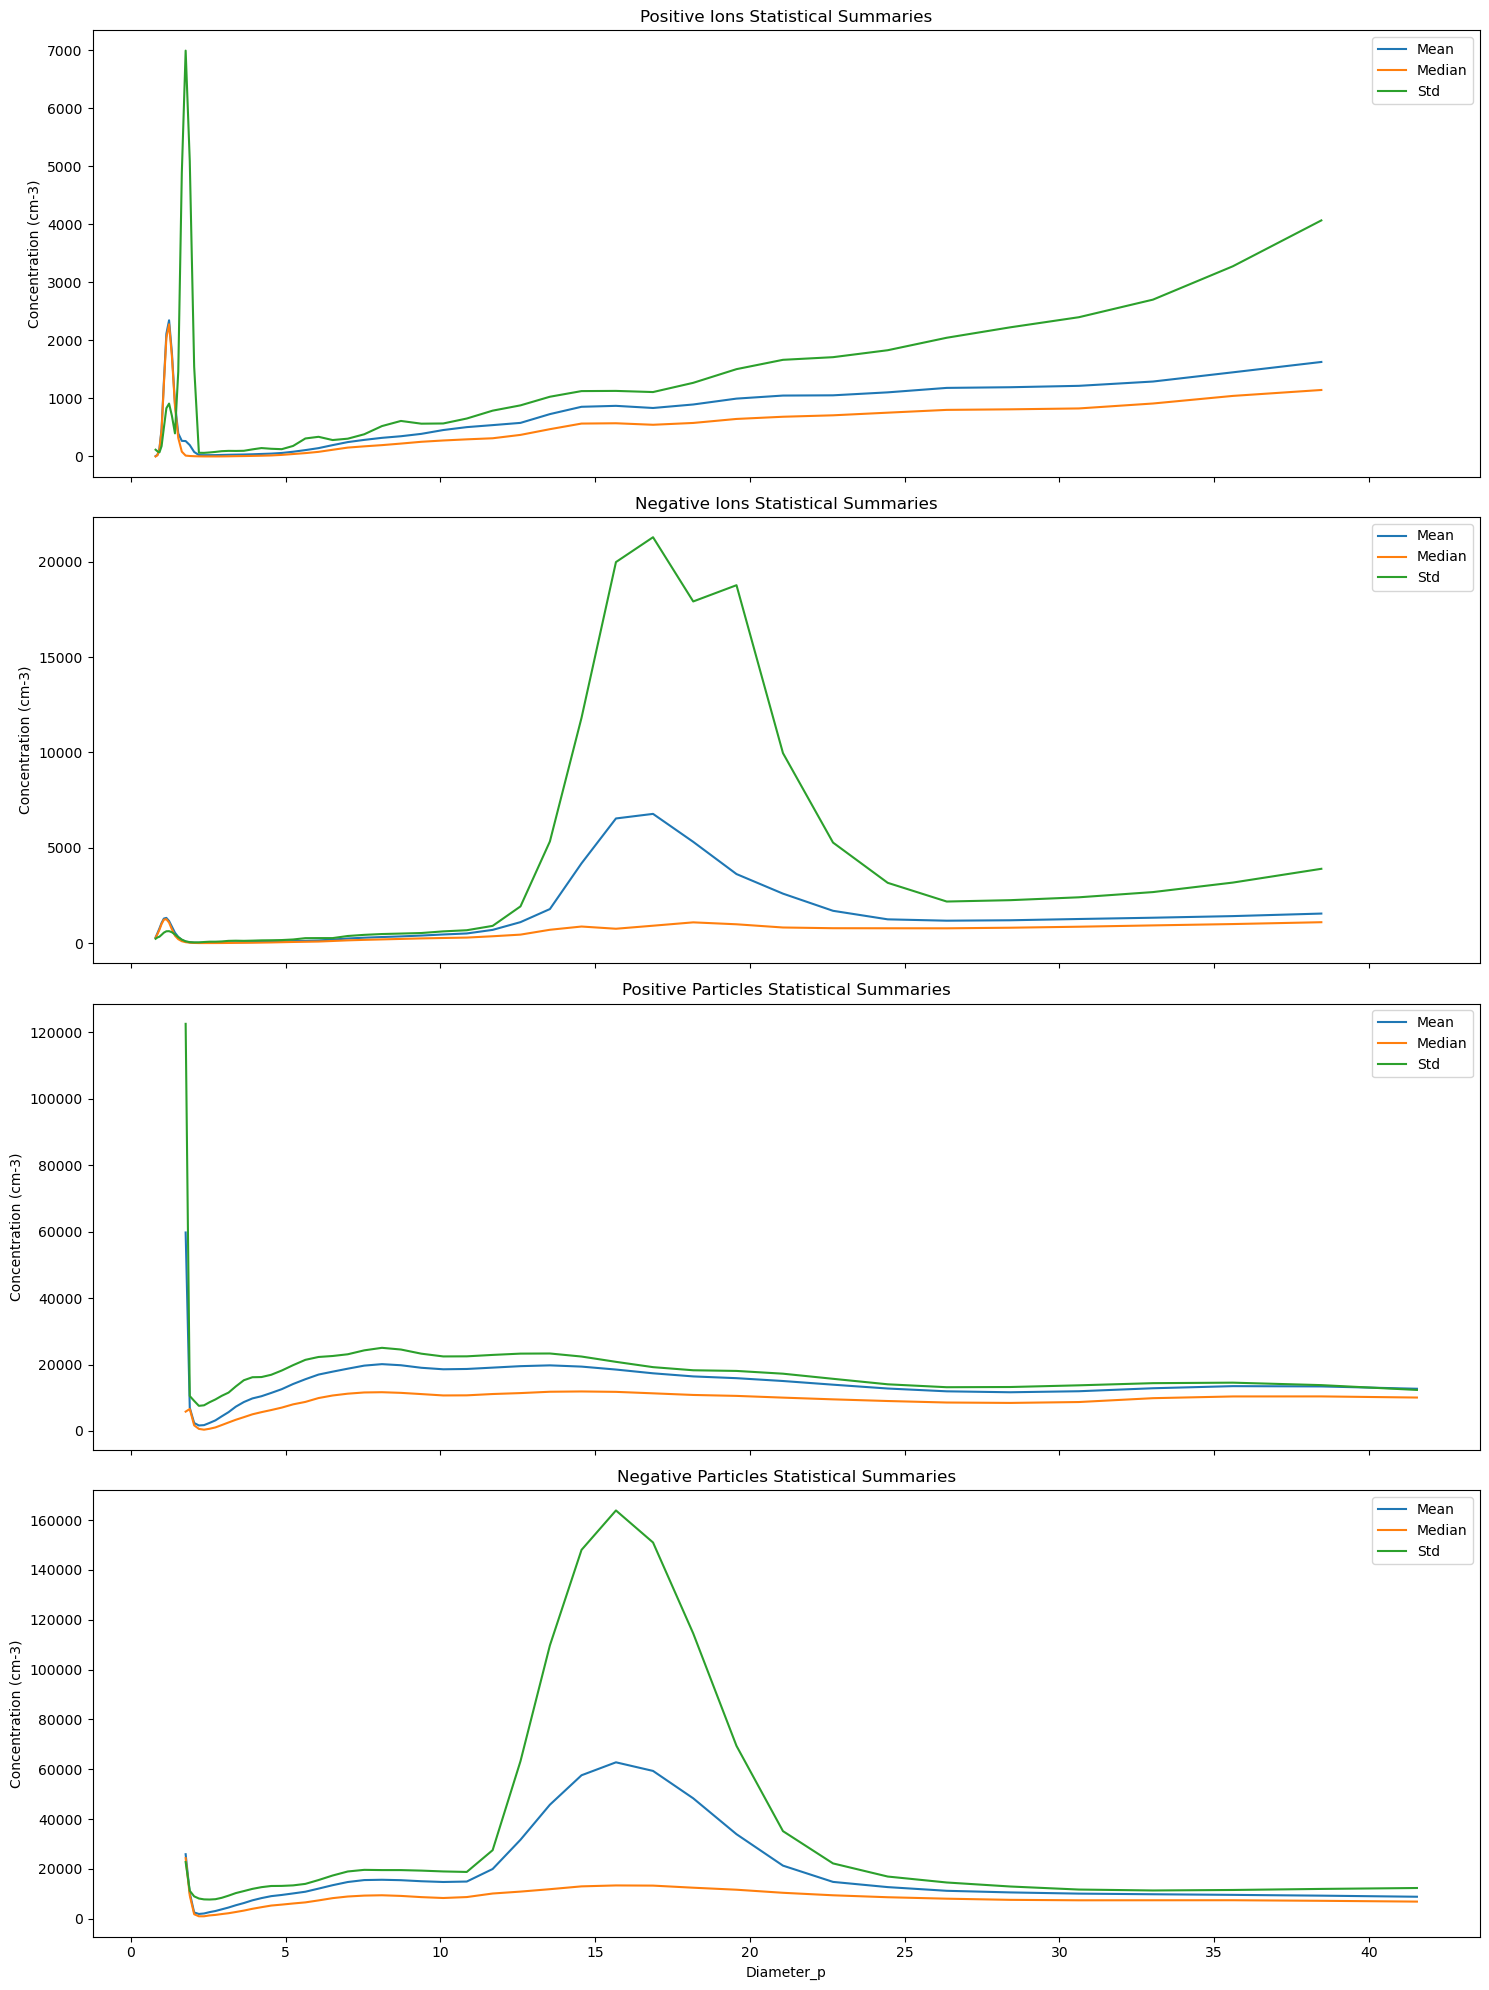

In [4]:
# Step 2: Statistical Summaries
def compute_statistics(data):
    mean = data.mean(dim='time')
    median = data.median(dim='time')
    std_dev = data.std(dim='time')
    return mean, median, std_dev

pos_ions_mean, pos_ions_median, pos_ions_std = compute_statistics(dataset['pos_ions'])
neg_ions_mean, neg_ions_median, neg_ions_std = compute_statistics(dataset['neg_ions'])
pos_particles_mean, pos_particles_median, pos_particles_std = compute_statistics(dataset['pos_particles'])
neg_particles_mean, neg_particles_median, neg_particles_std = compute_statistics(dataset['neg_particles'])


# 1.2 Statistical Summaries Plots
fig, axs = plt.subplots(4, 1, figsize=(15, 20), sharex=True)

# Positive ions
axs[0].plot(dataset['diameter'], pos_ions_mean, label='Mean', color='tab:blue')
axs[0].plot(dataset['diameter'], pos_ions_median, label='Median', color='tab:orange')
axs[0].plot(dataset['diameter'], pos_ions_std, label='Std', color='tab:green')
axs[0].set_title('Positive Ions Statistical Summaries')
axs[0].set_ylabel('Concentration (cm-3)')
axs[0].legend()

# Negative ions
axs[1].plot(dataset['diameter'], neg_ions_mean, label='Mean', color='tab:blue')
axs[1].plot(dataset['diameter'], neg_ions_median, label='Median', color='tab:orange')
axs[1].plot(dataset['diameter'], neg_ions_std, label='Std', color='tab:green')
axs[1].set_title('Negative Ions Statistical Summaries')
axs[1].set_ylabel('Concentration (cm-3)')
axs[1].legend()

# Positive particles
axs[2].plot(dataset['diameter'], pos_particles_mean, label='Mean', color='tab:blue')
axs[2].plot(dataset['diameter'], pos_particles_median, label='Median', color='tab:orange')
axs[2].plot(dataset['diameter'], pos_particles_std, label='Std', color='tab:green')
axs[2].set_title('Positive Particles Statistical Summaries')
axs[2].set_ylabel('Concentration (cm-3)')
axs[2].legend()

# Negative particles
axs[3].plot(dataset['diameter'], neg_particles_mean, label='Mean', color='tab:blue')
axs[3].plot(dataset['diameter'], neg_particles_median, label='Median', color='tab:orange')
axs[3].plot(dataset['diameter'], neg_particles_std, label='Std', color='tab:green')
axs[3].set_title('Negative Particles Statistical Summaries')
axs[3].set_ylabel('Concentration (cm-3)')
axs[3].set_xlabel('Diameter_p')
axs[3].legend()

plt.tight_layout()
plt.show()

#### From the analysis above, the standard deviation values for the negative particles and ions alike is quite high between about 12nm and 22nm diameter range. The positive ions and particles are more stable

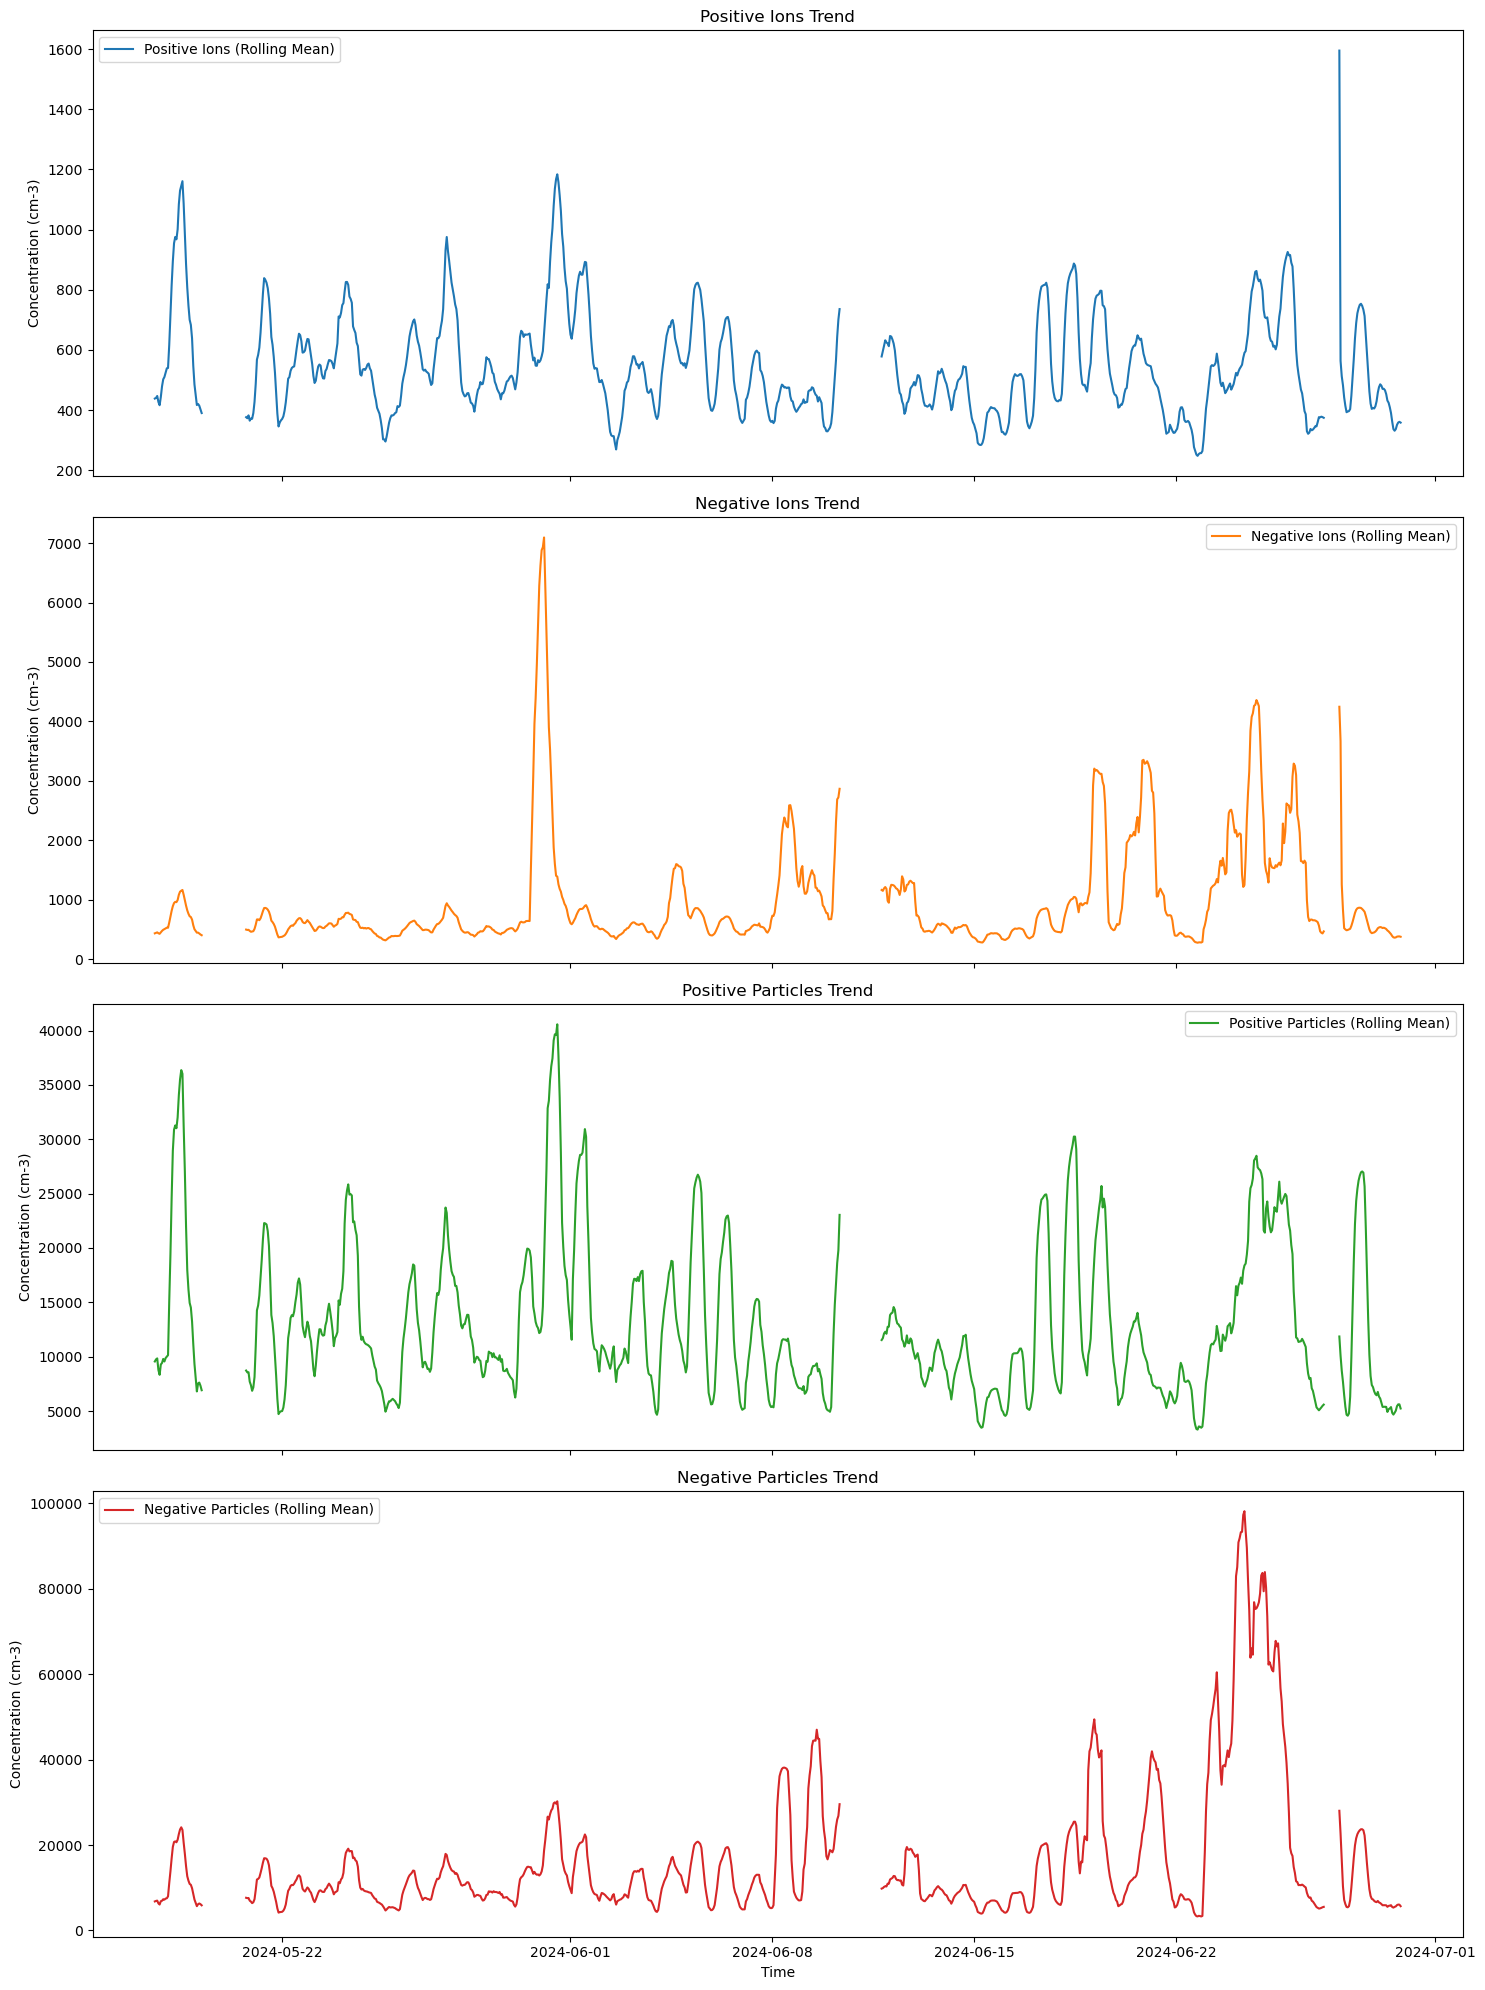

In [5]:
# Step 3: Trend Analysis
# Compute rolling mean to identify trends
# We are dealing with hourly data, what is the best window size to perform rolling mean? Take 12 hours maybe (diurnal)?
window_size = 12
pos_ions_rolling_mean = pos_ions.rolling(time=window_size, center=True).mean()
neg_ions_rolling_mean = neg_ions.rolling(time=window_size, center=True).mean()
pos_particles_rolling_mean = pos_particles.rolling(time=window_size, center=True).mean()
neg_particles_rolling_mean = neg_particles.rolling(time=window_size, center=True).mean()

# 1.3 Plot rolling means
fig, axs = plt.subplots(4, 1, figsize=(15, 20), sharex=True)

axs[0].plot(dataset['time'], pos_ions_rolling_mean, label='Positive Ions (Rolling Mean)', color='tab:blue')
axs[0].set_title('Positive Ions Trend')
axs[0].set_ylabel('Concentration (cm-3)')
axs[0].legend()

axs[1].plot(dataset['time'], neg_ions_rolling_mean, label='Negative Ions (Rolling Mean)', color='tab:orange')
axs[1].set_title('Negative Ions Trend')
axs[1].set_ylabel('Concentration (cm-3)')
axs[1].legend()

axs[2].plot(dataset['time'], pos_particles_rolling_mean, label='Positive Particles (Rolling Mean)', color='tab:green')
axs[2].set_title('Positive Particles Trend')
axs[2].set_ylabel('Concentration (cm-3)')
axs[2].legend()

axs[3].plot(dataset['time'], neg_particles_rolling_mean, label='Negative Particles (Rolling Mean)', color='tab:red')
axs[3].set_title('Negative Particles Trend')
axs[3].set_ylabel('Concentration (cm-3)')
axs[3].set_xlabel('Time')
axs[3].legend()

plt.tight_layout()
plt.show()

#### The positive particles and ions vary more widely than the negative?

In [6]:
# Step 4: Correlation Analysis
# Compute correlations
correlations = {
    "pos_ions_vs_neg_ions": xr.corr(dataset['pos_ions'].mean(dim='diameter'), dataset['neg_ions'].mean(dim='diameter')),
    "pos_particles_vs_neg_particles": xr.corr(dataset['pos_particles'].mean(dim='diameter'), dataset['neg_particles'].mean(dim='diameter')),
    "pos_ions_vs_pos_particles": xr.corr(dataset['pos_ions'].mean(dim='diameter'), dataset['pos_particles'].mean(dim='diameter')),
    "neg_ions_vs_neg_particles": xr.corr(dataset['neg_ions'].mean(dim='diameter'), dataset['neg_particles'].mean(dim='diameter')),
}

# Print correlations
print("Correlation between Positive Ions and Negative Ions:", correlations["pos_ions_vs_neg_ions"].values)
print("Correlation between Positive Particles and Negative Particles:", correlations["pos_particles_vs_neg_particles"].values)
print("Correlation between Positive Ions and Positive Particles:", correlations["pos_ions_vs_pos_particles"].values)
print("Correlation between Negative Ions and Negative Particles:", correlations["neg_ions_vs_neg_particles"].values)


Correlation between Positive Ions and Negative Ions: 0.4123625462599475
Correlation between Positive Particles and Negative Particles: 0.5848084469165065
Correlation between Positive Ions and Positive Particles: 0.6436830530619871
Correlation between Negative Ions and Negative Particles: 0.3243237136553278


### Spectral plots

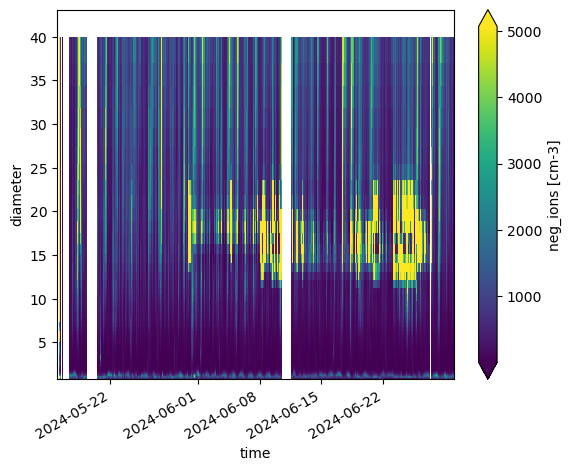

In [7]:
dataset.neg_ions.T.plot(robust=True)

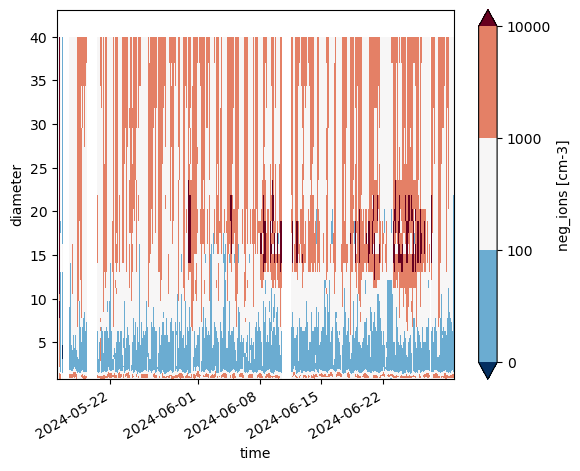

In [8]:
dataset.neg_ions.T.plot(levels=[0,100,1000,10000])

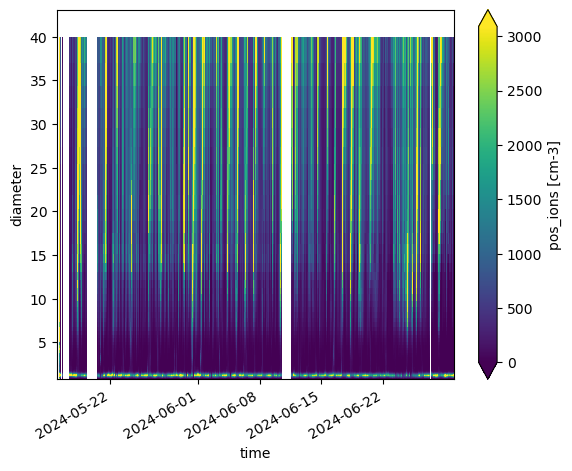

In [9]:
dataset.pos_ions.T.plot(robust=True)

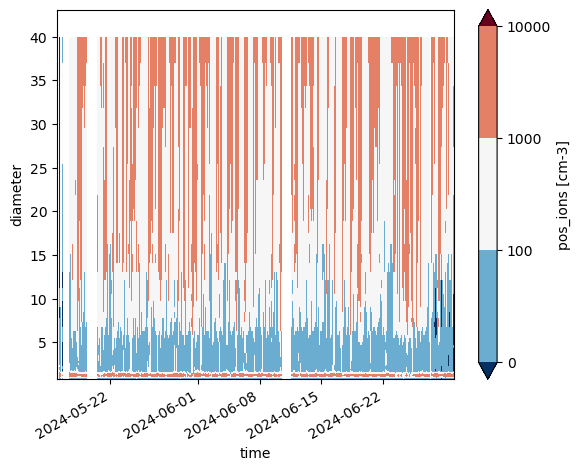

In [10]:
dataset.pos_ions.T.plot(levels=[0,100,1000,10000])

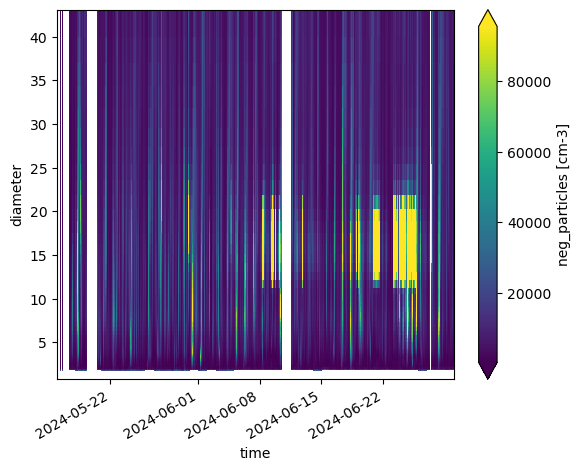

In [11]:
dataset.neg_particles.T.plot(robust=True)

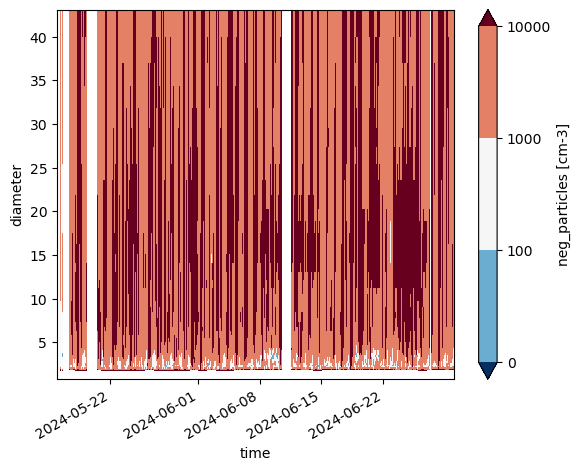

In [12]:
dataset.neg_particles.T.plot(levels=[0,100,1000,10000])

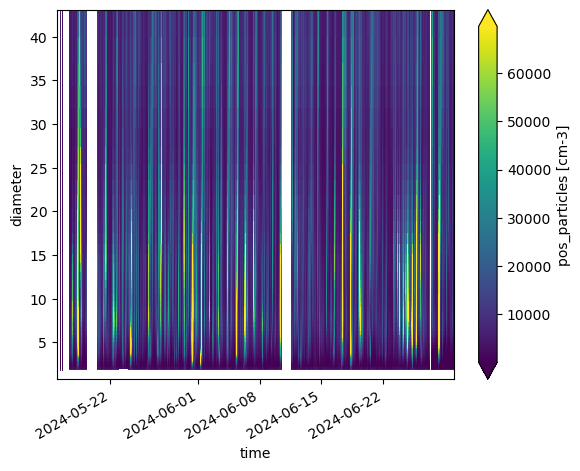

In [13]:
dataset.pos_particles.T.plot(robust=True)

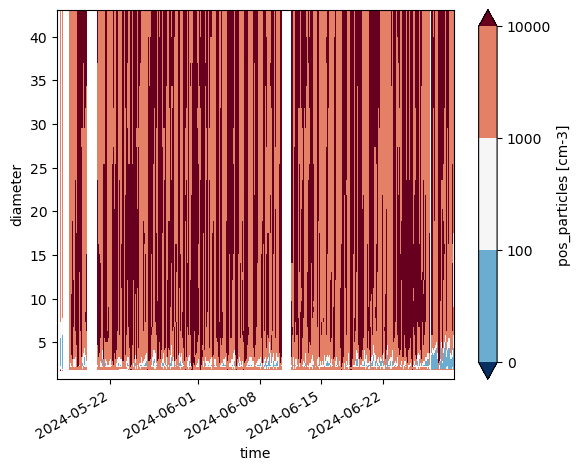

In [14]:
dataset.pos_particles.T.plot(levels=[0,100,1000,10000])

#### more plots....

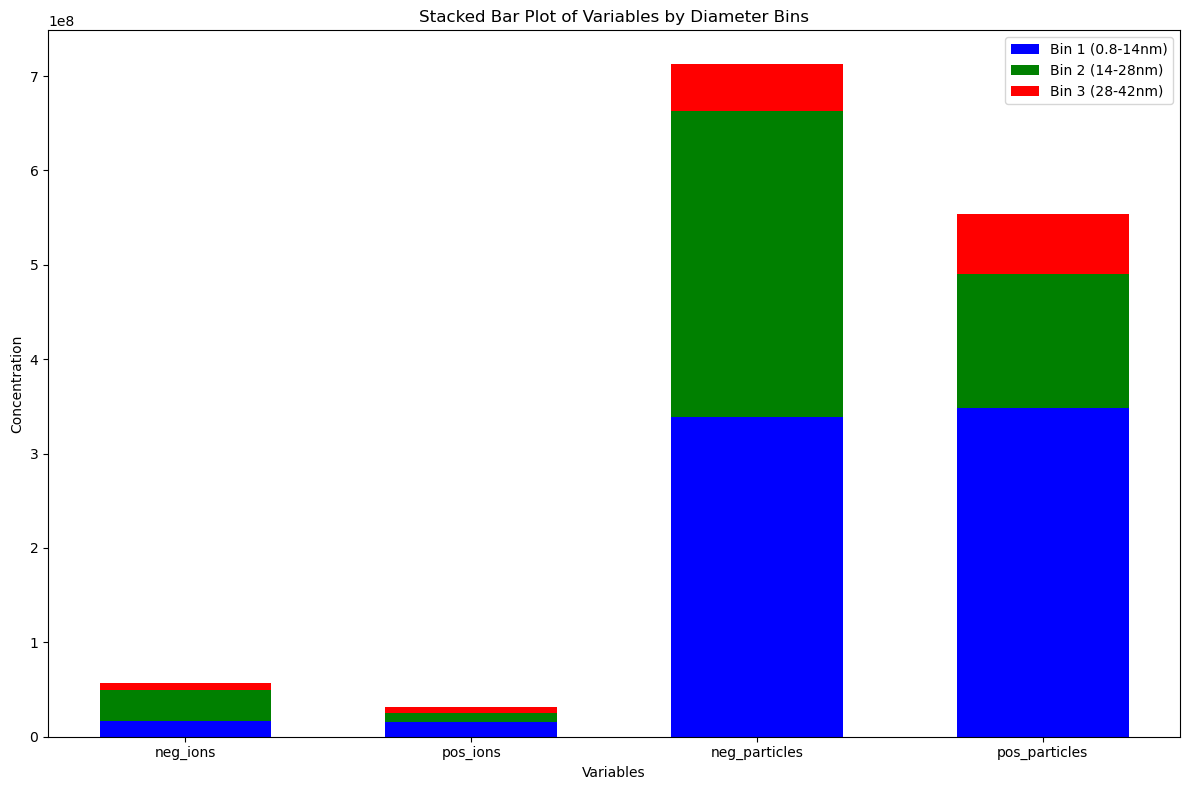

In [15]:

# Define the number of bins
num_bins = 3

# Create bins for the diameter
# only gets to 42nm hence nothing in accumulation mode
diameter_bins = np.linspace(data['diameter'].min().item(), data['diameter'].max().item(), num_bins + 1)
#diameter_bins = [1, 10, 100, 1000]
bin_labels = ['Bin 1 (0.8-14nm)', 'Bin 2 (14-28nm)', 'Bin 3 (28-42nm)']

# List of variables to plot
variables = ['neg_ions', 'pos_ions', 'neg_particles', 'pos_particles']

# Colors for each diameter bin in the stacked bar plot
colors = ['blue', 'green', 'red']

# Initialize lists to hold bin sums for each variable
bin_sums = {var: [] for var in variables}

# Calculate the sum for each variable within each bin
for j in range(num_bins):
    bin_mask = (data['diameter'] >= diameter_bins[j]) & (data['diameter'] < diameter_bins[j+1])
    for var in variables:
        binned_data = data[var].where(bin_mask, drop=True)
        bin_sums[var].append(binned_data.sum().item())

# Create a stacked bar plot
fig, ax = plt.subplots(figsize=(12, 8))

# Bar positions
bar_width = 0.6
bar_positions = np.arange(len(variables))

# Bottoms for stacked bars
bottoms = np.zeros(len(variables))

# Plot each bin
for j in range(num_bins):
    bin_values = [bin_sums[var][j] for var in variables]
    ax.bar(bar_positions, bin_values, bar_width, bottom=bottoms, color=colors[j], label=bin_labels[j])
    bottoms += np.array(bin_values)

# Add labels and title
ax.set_xlabel('Variables')
ax.set_ylabel('Concentration')
ax.set_title('Stacked Bar Plot of Variables by Diameter Bins')
ax.set_xticks(bar_positions)
ax.set_xticklabels(variables)
ax.legend(loc='upper right')

plt.tight_layout()
plt.show()


In [16]:
diameter_bins

array([8.02879995e-10, 1.43861530e-08, 2.79694261e-08, 4.15526991e-08])

### Call in the other data - temp, RH, WD, WS, Rain, NO, NO2, NOx, O3

In [17]:
met = pd.read_csv('/home/coliewo/Desktop/data/meteo/met_may_jun24.txt')   
no = pd.read_csv('/home/coliewo/Desktop/data/NOx/NO_may_june24.txt')
ozone = pd.read_csv('/home/coliewo/Desktop/data/ozone/ozone_may_june24.txt')

In [18]:
#new column for datetime
met['Date'] = pd.to_datetime(met['#date'] + ' ' + met['time'])
no['Date'] = pd.to_datetime(no['#date'] + ' ' + no['time'])
ozone['Date'] = pd.to_datetime(ozone['#date'] + ' ' + ozone['time'])

In [19]:
# Set datetime as index
met.set_index('Date', inplace=True)
no.set_index('Date', inplace=True)
ozone.set_index('Date', inplace=True)

In [20]:
# Descriptive Statistics to identify any outliers in the data??

print(met.describe())
print(no.describe())
print(ozone.describe())

            day_dec   WD_min[Deg]   WD_ave[Deg]   WD_max[Deg]   WS_min[m/s]  \
count  87480.000000  87312.000000  87312.000000  87312.000000  87312.000000   
mean     151.526396    185.820105    184.391158    185.135239      0.683900   
std       17.622732     94.547636     89.372954     91.027029      0.507532   
min      121.000000      0.000000      0.000000      0.000000      0.000000   
25%      136.269271    105.000000     90.600000    100.000000      0.300000   
50%      151.546180    197.000000    198.300000    202.000000      0.600000   
75%      166.806423    252.000000    235.800000    239.000000      0.900000   
max      181.999306    359.000000    360.000000    359.000000      4.800000   

        WS_ave[m/s]   WS_max[m/s]      T_air[C]  T_internal[C]        RH[%%]  \
count  87312.000000  87312.000000  87312.000000   87312.000000  87312.000000   
mean       1.745050      2.872162     21.439657      22.102361     55.095889   
std        0.945312      1.495695      4.674831 

#### Values in the met file look okay
#### NO file has some negative values, to remove??
#### O3 data has -27880 as min value (bad data)??

In [21]:
# Start with NO data
# Replace values less than 0 with NaN in specific columns
columns = ['NO[ppb]', 'NO2[ppb]', 'NOx[ppb]']

no[columns] = no[columns].applymap(lambda x: np.nan if x < 0 else x)

# Replace values with NaN where 'status' is 'SPAN'
no.loc[no['status'] == 'SPAN', columns] = np.nan

print(no.describe())

/tmp/ipykernel_5701/1717307678.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  no[columns] = no[columns].applymap(lambda x: np.nan if x < 0 else x)


             daydec       NO[ppb]      NO2[ppb]      NOx[ppb]      Pre  \
count  86495.000000  51601.000000  85450.000000  84500.000000  86495.0   
mean     151.311520      0.819622      3.658690      4.143939   -999.0   
std       17.542543      1.533862      3.111466      3.936032      0.0   
min      121.000000      0.000000      0.000000      0.000000   -999.0   
25%      136.028819      0.224000      1.666000      1.700000   -999.0   
50%      151.306250      0.492000      2.752000      3.049000   -999.0   
75%      166.322569      0.892000      4.685000      5.278000   -999.0   
max      181.999306     35.124000     29.509000     51.868000   -999.0   

       Pre_low  Pre_High         T_int  ReactCellT[C]      T_Cooler  \
count  86495.0   86495.0  86495.000000   86495.000000  86495.000000   
mean    -999.0    -999.0     33.447324      39.991926     -1.243833   
std        0.0       0.0      0.644272       0.003021      0.015314   
min     -999.0    -999.0     29.682000      39.83

In [22]:
# Now O3 data
# Replace values less than 0 with NaN in specific column
column = ['O3']

ozone[column] = ozone[column].applymap(lambda x: np.nan if x < 0 else x)

print(ozone.describe())

             daydec            O3   Intensity_A   Intensity_B       T_bench  \
count  87484.000000  87483.000000  87484.000000  87484.000000  87484.000000   
mean     151.552042     38.697184  71101.626560  75502.973835     33.564361   
std       17.616044     14.058013    469.819646    313.192822      0.626420   
min      121.000000      0.790300      0.000000  61087.000000     28.900000   
25%      136.188020     29.540000  70733.000000  75209.000000     33.200000   
50%      151.610764     39.170000  70977.000000  75452.000000     33.500000   
75%      166.798785     47.690000  71502.000000  75782.000000     34.000000   
max      181.999306     89.480000  71981.000000  76353.000000     36.100000   

             T_lamp     T_03_lamp        Flow_A        Flow_B             P  
count  87484.000000  8.748400e+04  87484.000000  87484.000000  87484.000000  
mean      53.136916  4.240000e+01      0.633005      0.632367    746.247033  
std        0.056387  6.215863e-11      0.005293      0

/tmp/ipykernel_5701/2177576757.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ozone[column] = ozone[column].applymap(lambda x: np.nan if x < 0 else x)


In [23]:
#Keep only relevant data?
# Create a second DataFrame with fewer columns
columns_to_keep = ['T_air[C]', 'RH[%%]', 'Rain_acc[mm]', 'WD_ave[Deg]', 'WS_ave[m/s]']
met2 = met[columns_to_keep]

no2 = no[columns]  # already described above

ozone2 = ozone[column]

### Visualize the data

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

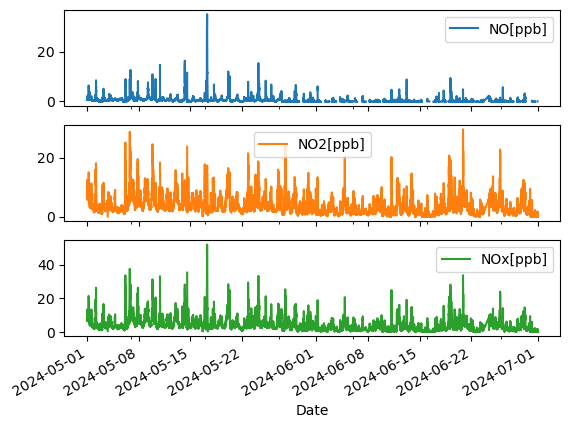

In [24]:
# Time Series Plots
#plt.figure(figsize=(15, 20))
no2[['NO[ppb]', 'NO2[ppb]', 'NOx[ppb]']].plot(subplots=True)
#plt.title("NO Time Series Plots")
#plt.show()

<Axes: xlabel='Date'>

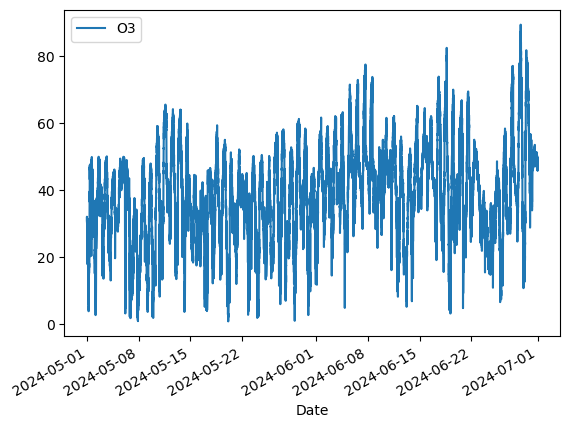

In [25]:
ozone2[['O3']].plot()

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

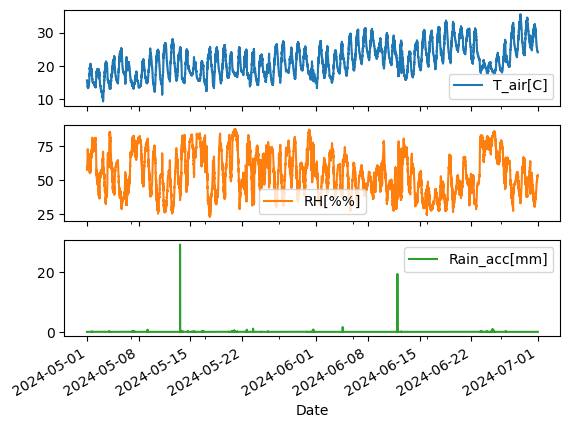

In [26]:
met2[['T_air[C]', 'RH[%%]', 'Rain_acc[mm]']].plot(subplots=True)

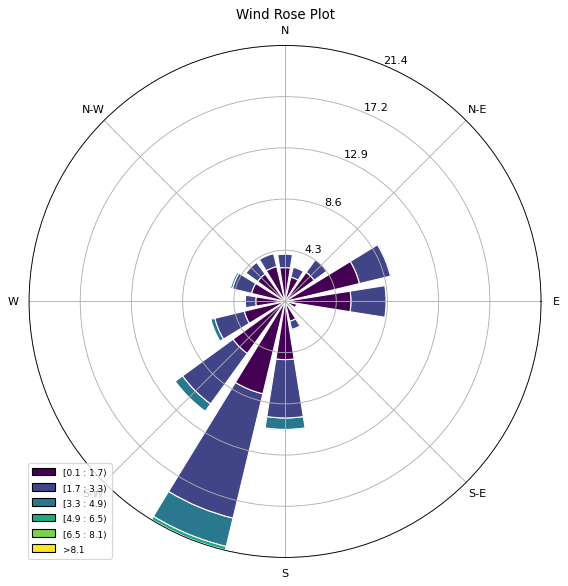

In [27]:
# Wind Rose Plot for the WD, WS data

from windrose import WindroseAxes
ax = WindroseAxes.from_ax()
ax.bar(met2['WD_ave[Deg]'], met2['WS_ave[m/s]'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title("Wind Rose Plot")
plt.show()

### Correlation Analysis between Negative particles and the different variables

In [28]:
# Average neg_particles over the diameter dimension and convert to a pandas DataFrame
neg_particles = dataset['neg_particles'].mean(dim='diameter').to_dataframe().reset_index()
neg_particles['time'] = pd.to_datetime(neg_particles['time'])
neg_particles_df = neg_particles.set_index('time')


In [29]:
# Merge the two datasets on the time index
merged_df = pd.merge(neg_particles_df, no2, left_index=True, right_index=True, how='inner')

# Compute correlation
correlation = merged_df.corr()

# Extract the correlation value between neg_particles and NOx
neg_particles_no_correlation = correlation.loc['neg_particles', 'NO[ppb]']
neg_particles_no2_correlation = correlation.loc['neg_particles', 'NO2[ppb]']
neg_particles_nox_correlation = correlation.loc['neg_particles', 'NOx[ppb]']

print(f'Correlation between Negative Particles and NO: {neg_particles_no_correlation}')
print(f'Correlation between Negative Particles and NO2: {neg_particles_no2_correlation}')
print(f'Correlation between Negative Particles and NOx: {neg_particles_nox_correlation}')


Correlation between Negative Particles and NO: 0.009855092996168423
Correlation between Negative Particles and NO2: 0.21471429754586296
Correlation between Negative Particles and NOx: 0.2035275195069866


In [30]:
# Merge the two datasets on the time index
merged2_df = pd.merge(neg_particles_df, met2, left_index=True, right_index=True, how='inner')

# Compute correlation2
correlation2 = merged2_df.corr()

# Extract the correlation2 value between neg_particles and met values
neg_particles_temp_correlation = correlation2.loc['neg_particles', 'T_air[C]']
neg_particles_rh_correlation = correlation2.loc['neg_particles', 'RH[%%]']
neg_particles_rain_correlation = correlation2.loc['neg_particles', 'Rain_acc[mm]']

print(f'Correlation between Negative Particles and Temp: {neg_particles_temp_correlation}')
print(f'Correlation between Negative Particles and RH: {neg_particles_rh_correlation}')
print(f'Correlation between Negative Particles and Rain: {neg_particles_rain_correlation}')


Correlation between Negative Particles and Temp: -0.028896533902825542
Correlation between Negative Particles and RH: 0.23985220442463615
Correlation between Negative Particles and Rain: 0.04604412222182278


In [31]:
# Merge the two datasets on the time index
merged3_df = pd.merge(neg_particles_df, ozone2, left_index=True, right_index=True, how='inner')

# Compute correlation3
correlation3 = merged3_df.corr()

# Extract the correlation3 value between neg_particles and met values
neg_particles_ozone_correlation = correlation3.loc['neg_particles', 'O3']

print(f'Correlation between Negative Particles and Ozone: {neg_particles_ozone_correlation}')


Correlation between Negative Particles and Ozone: -0.13785613177969216


### Scatter Plots....

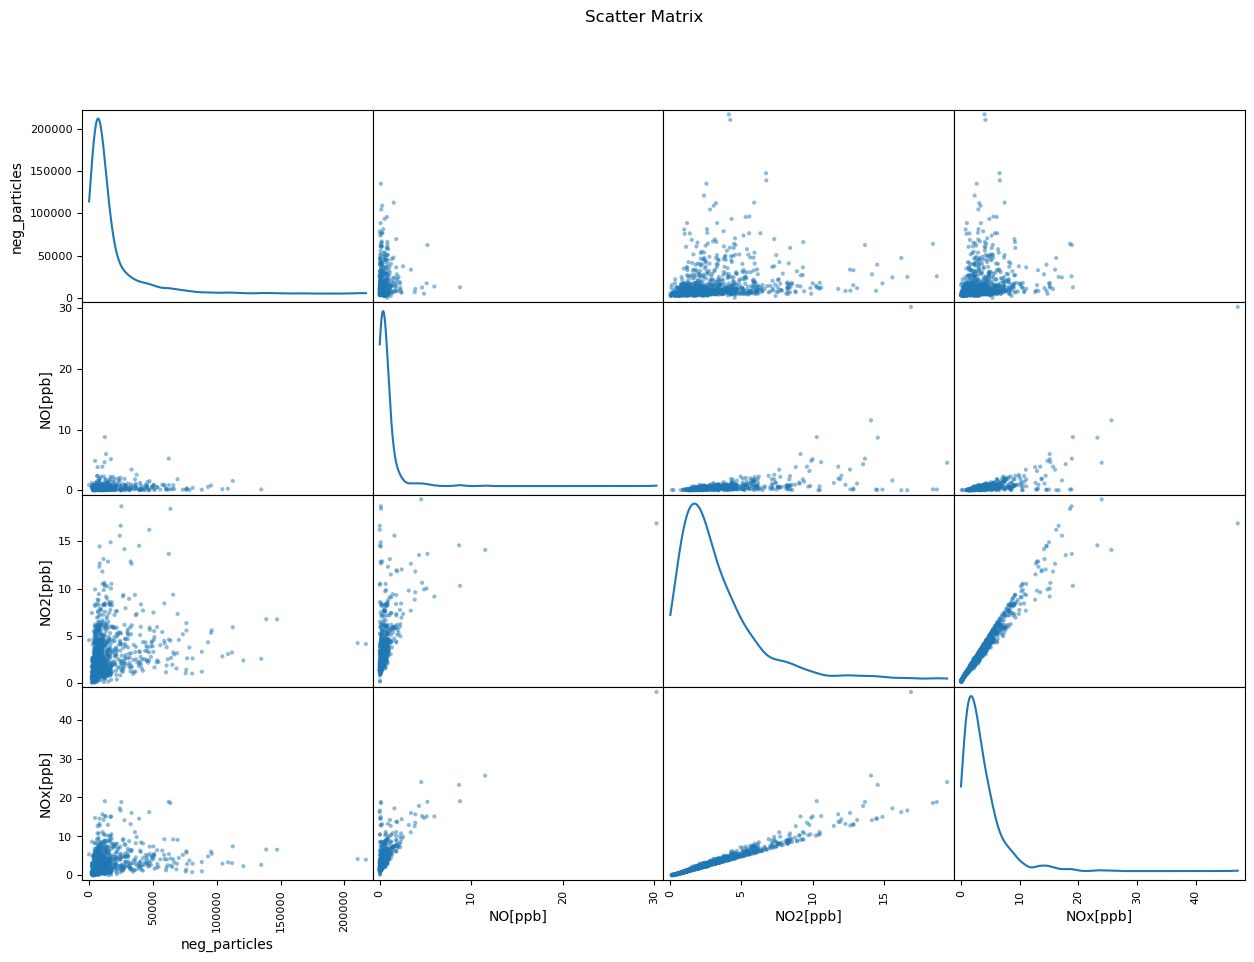

In [32]:
# Scatter Matrix
pd.plotting.scatter_matrix(merged_df, figsize=(15, 10), diagonal='kde')
plt.suptitle("Scatter Matrix")
plt.show()

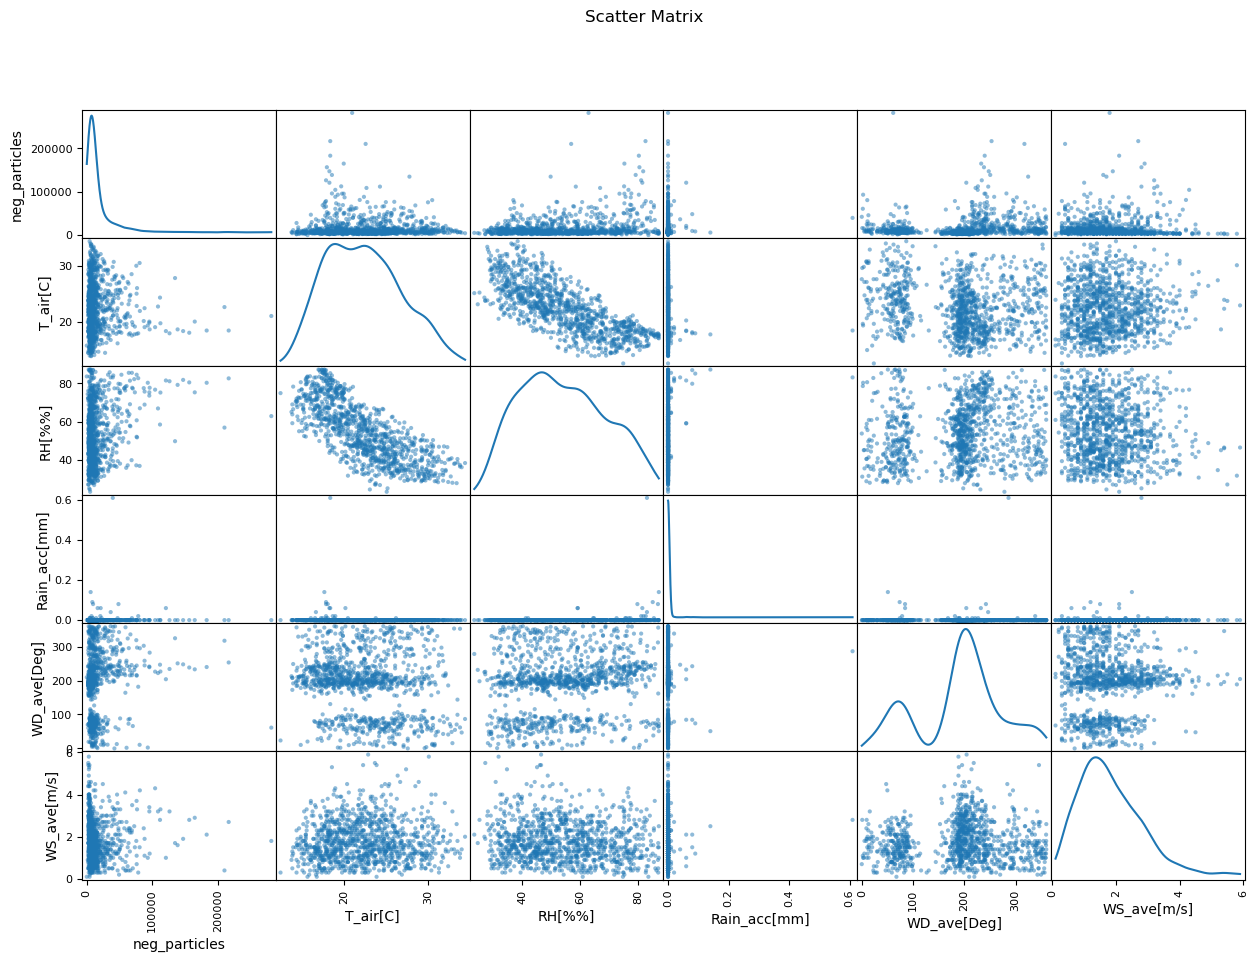

In [33]:
# Scatter Matrix
pd.plotting.scatter_matrix(merged2_df, figsize=(15, 10), diagonal='kde')
plt.suptitle("Scatter Matrix")
plt.show()

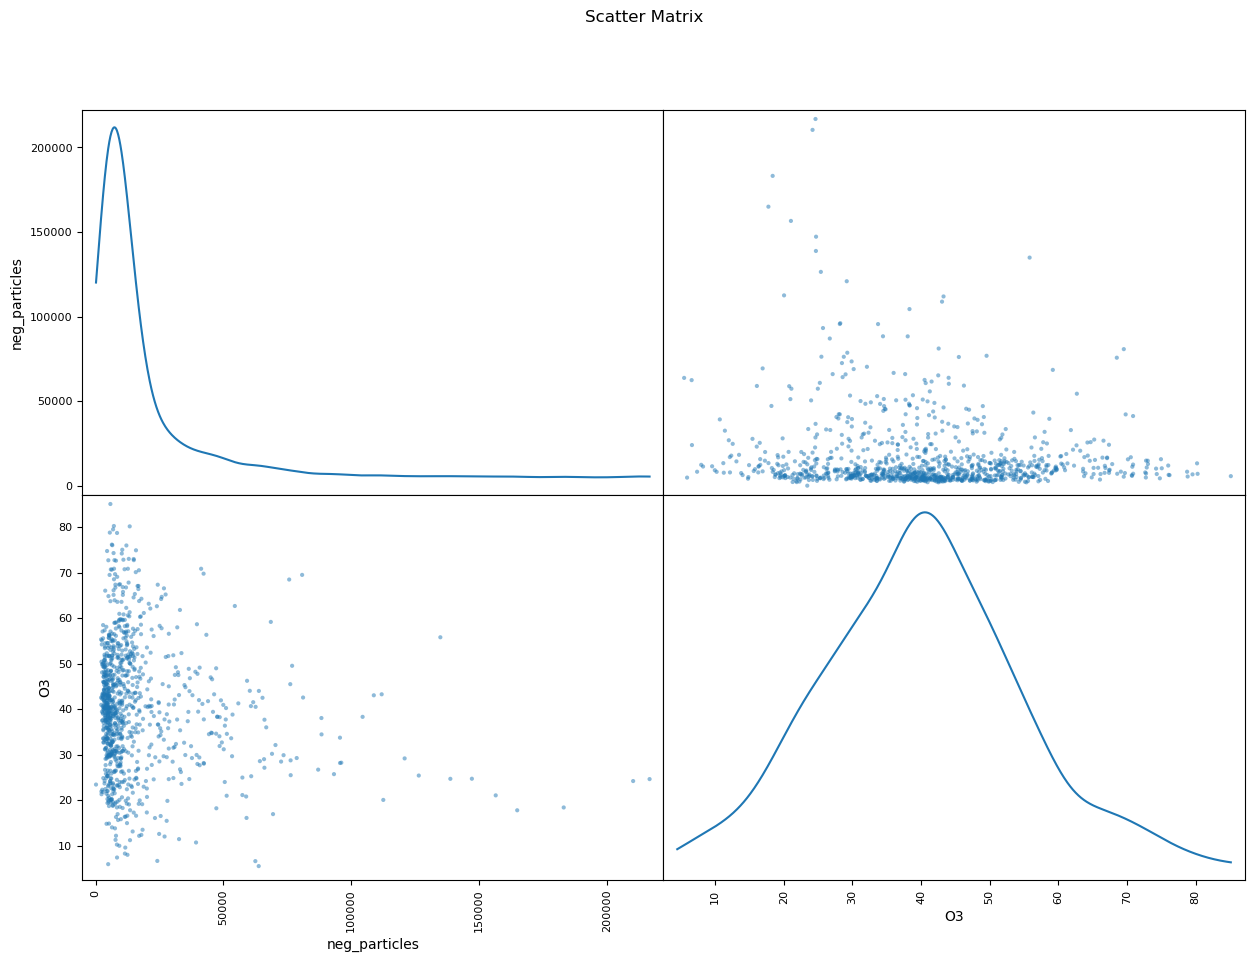

In [34]:
# Scatter Matrix
pd.plotting.scatter_matrix(merged3_df, figsize=(15, 10), diagonal='kde')
plt.suptitle("Scatter Matrix")
plt.show()

### Nanoparticle ranking analysis: determining new particle formation (NPF) event occurrence and intensity based on the concentration spectrum of formed (sub-5 nm) particles
https://doi.org/10.5194/ar-1-81-2023

Subsequently, we employ a two-fold approach: 
#### firstly, the derived $\Delta$ N2.5−5 values are used to rank NPF events, and
#### secondly, we scrutinize the logarithmic distribution of these values to discern any dominant modes

In [35]:
# Step 1: Extract data for the diameter range required 2.5-5nm
ds_2p5_5nm = dataset['neg_particles'].sel(diameter=slice(2.5, 5)) 


# Should I repeat this while averaging over the diameter range?

In [36]:
ds_2p5_5nm

<xarray.DataArray 'neg_particles' (time: 1081, diameter: 10)>
array([[        nan,         nan,         nan, ...,         nan,         nan,
                nan],
       [        nan,         nan,         nan, ...,         nan,         nan,
                nan],
       [        nan,         nan,         nan, ...,         nan,         nan,
                nan],
       ...,
       [ 627.608706,  658.406955, 1047.195848, ..., 3695.756149, 4314.862024,
        4575.879331],
       [ 252.848542,  494.867587,  404.279244, ..., 1220.205738, 1611.609949,
        1944.126849],
       [ 510.434755,  471.272613,  484.89185 , ...,  916.23926 , 1141.077917,
        1418.255486]])
Coordinates:
  * diameter  (diameter) float64 2.545 2.736 2.941 3.16 ... 4.224 4.538 4.879
  * time      (time) datetime64[ns] 2024-05-16 ... 2024-06-30
Attributes:
    units:        cm-3
    description:  Negative particle number-size distribution (dN/dlogDp)

In [37]:
# Step 2: Smooth out the time series, apply rolling median over 2hr intervals

ds_2p5_5nm_rolling_mean = ds_2p5_5nm.rolling(time=2, center=True).median()

# Drop NaN values resulting from the rolling operation
#ds_2p5_5nm_rolling_mean.dropna(dim='time', how='all')
rolling_median = ds_2p5_5nm_rolling_mean.dropna(dim='time')
rolling_median

<xarray.DataArray 'neg_particles' (time: 1000, diameter: 10)>
array([[  396.94646147,   377.01711052,   398.15624596, ...,
        -6125.03103572, -6299.80445959, -5845.05209916],
       [  519.97516952,   549.28915184,   628.70458783, ...,
          297.00689848,   339.10285842,   359.33151333],
       [  853.8641654 ,   660.53425857,   588.68772669, ...,
          666.2142384 ,   598.59907564,   506.73399953],
       ...,
       [  496.91157498,   568.35477635,   940.37132861, ...,
         3431.63740907,  4184.95024915,  4452.46556208],
       [  440.22862365,   576.63727095,   725.73754622, ...,
         2457.98094354,  2963.23598628,  3260.00309014],
       [  381.64164853,   483.07009991,   444.58554692, ...,
         1068.22249874,  1376.34393301,  1681.19116753]])
Coordinates:
  * diameter  (diameter) float64 2.545 2.736 2.941 3.16 ... 4.224 4.538 4.879
  * time      (time) datetime64[ns] 2024-05-16T08:00:00 ... 2024-06-30
Attributes:
    units:        cm-3
    description:  Negative particle number-size distribution (dN/dlogDp)

In [38]:
np.min(rolling_median), np.max(rolling_median)   # we have negative values??

(<xarray.DataArray 'neg_particles' ()>
 array(-6299.80445959),
 <xarray.DataArray 'neg_particles' ()>
 array(113768.96099142))

In [39]:
#Step 3
#Identify diurnal background and active regions. we recommend dividing the dataset into seasons and examining the diurnal behaviour in each season separately
#Divide into weeks?

week1 = rolling_median.sel(time=slice('2024-05-19','2024-05-25'))     
week2 = rolling_median.sel(time=slice('2024-05-26','2024-06-01'))  
week3 = rolling_median.sel(time=slice('2024-06-02','2024-06-08')) 
week4 = rolling_median.sel(time=slice('2024-06-09','2024-06-15'))   
week5 = rolling_median.sel(time=slice('2024-06-16','2024-06-22'))   
week6 = rolling_median.sel(time=slice('2024-06-23','2024-06-29')) 


### Spectral plots for each week?

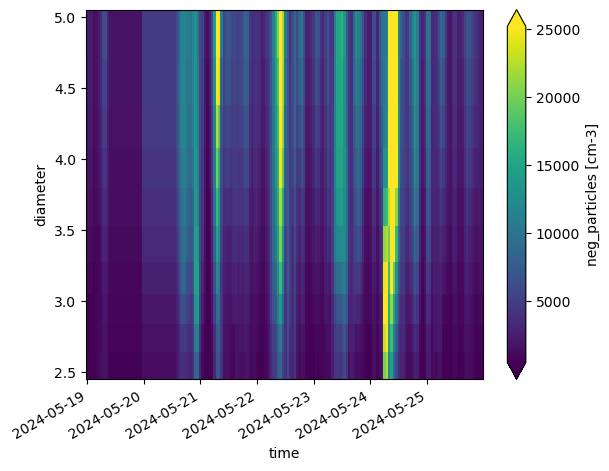

In [40]:
week1.T.plot(robust=True)

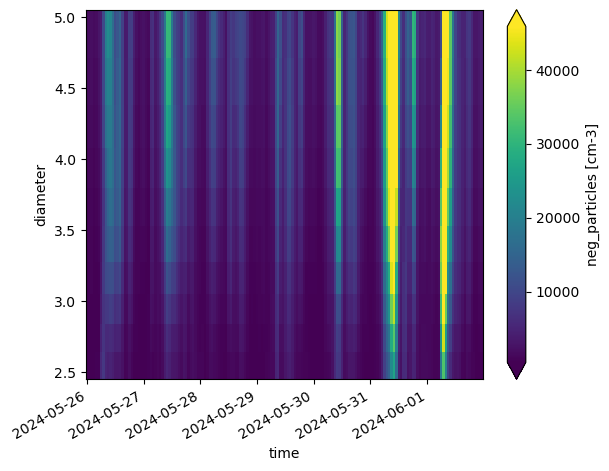

In [41]:
week2.T.plot(robust=True)

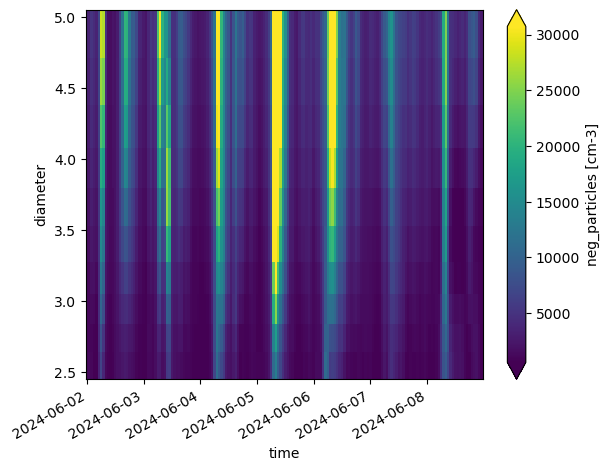

In [42]:
week3.T.plot(robust=True)

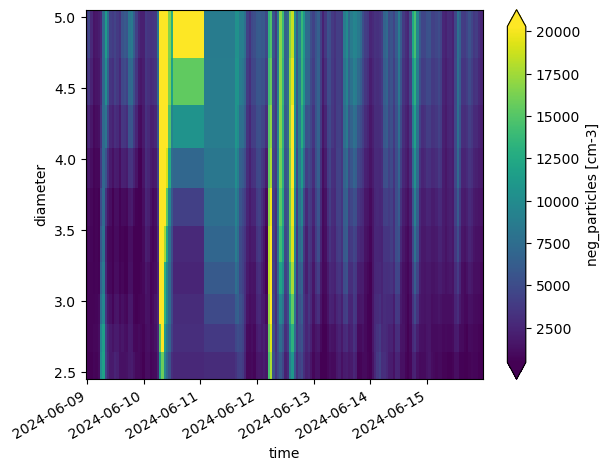

In [43]:
week4.T.plot(robust=True)

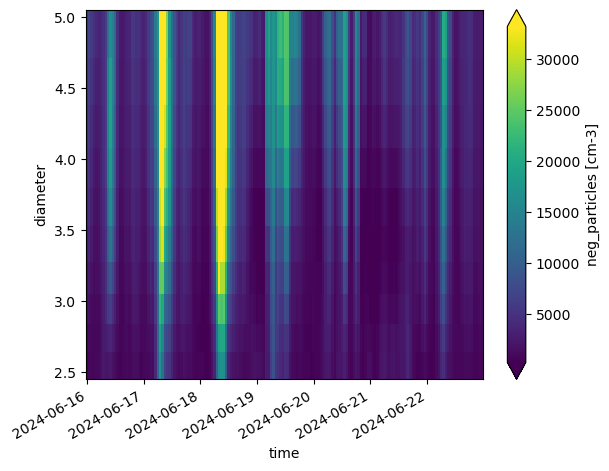

In [44]:
week5.T.plot(robust=True)

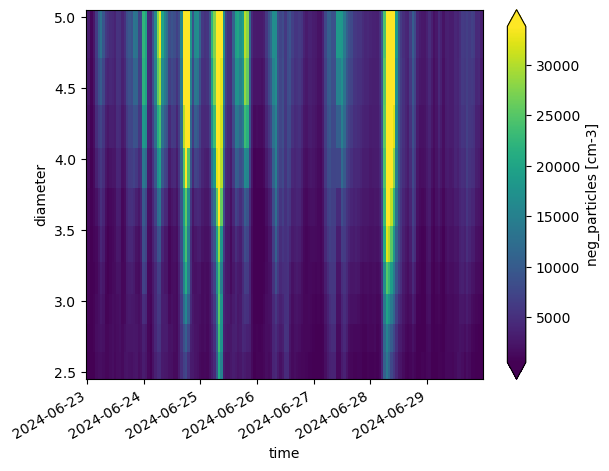

In [45]:
week6.T.plot(robust=True)

### Diurnal variations

In [46]:
#  Calculate diurnal variations
week1_diurnal_variation = week1.groupby(week1.time.dt.hour).mean(dim='time')

week2_diurnal_variation = week2.groupby(week2.time.dt.hour).mean(dim='time')

week3_diurnal_variation = week3.groupby(week3.time.dt.hour).mean(dim='time')

week4_diurnal_variation = week4.groupby(week4.time.dt.hour).mean(dim='time')

week5_diurnal_variation = week5.groupby(week5.time.dt.hour).mean(dim='time')

week6_diurnal_variation = week6.groupby(week6.time.dt.hour).mean(dim='time')

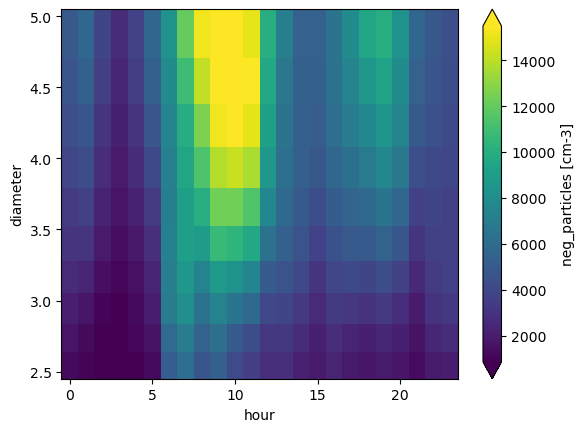

In [47]:
week1_diurnal_variation.T.plot(robust=True)

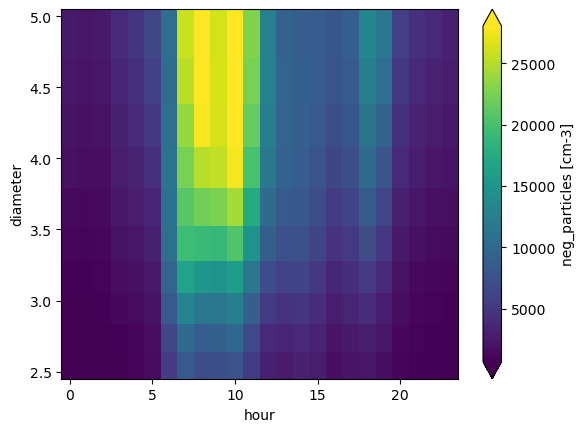

In [48]:
week2_diurnal_variation.T.plot(robust=True)

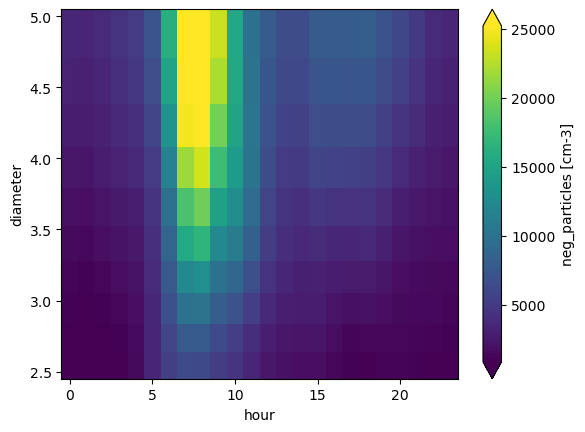

In [49]:
week3_diurnal_variation.T.plot(robust=True)

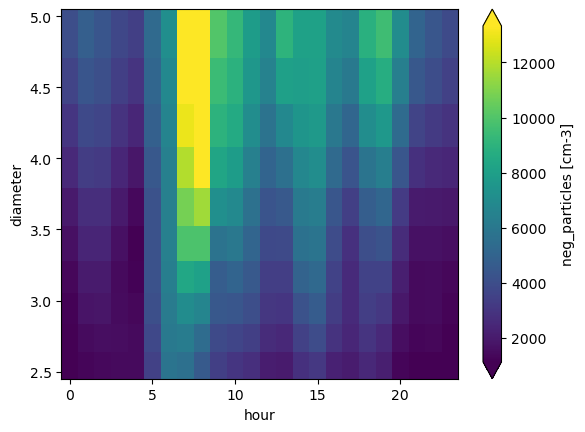

In [50]:
week4_diurnal_variation.T.plot(robust=True)

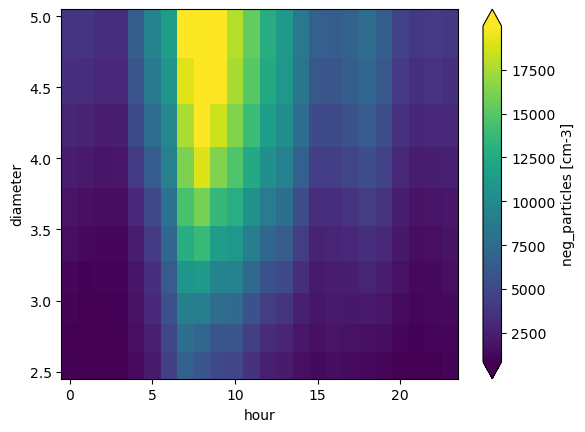

In [51]:
week5_diurnal_variation.T.plot(robust=True)

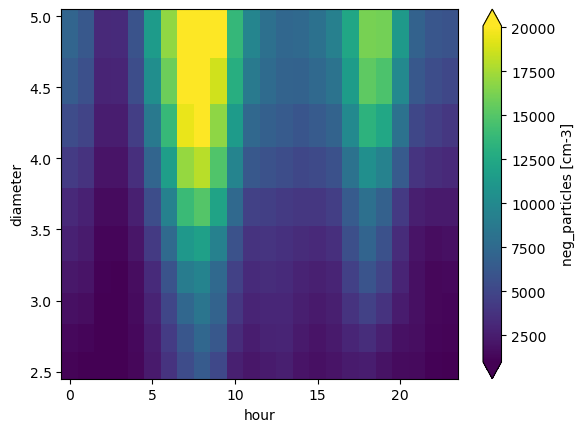

In [52]:
week6_diurnal_variation.T.plot(robust=True)

### Next

In [53]:
#Step 4: Find the background number concentration for each day (N_B;2.5−5 ).
#The background concentration corresponding to a given day is determined based on the median value of N2.5−5 in the so-called background region after applying the 2 h rolling smoothing of the time series (step 2)

# using rolling median data, get the median for each day
# Resample the data to daily frequency and calculate the median for each day
daily_median = rolling_median.resample(time='1D').median()

print(daily_median)

<xarray.DataArray 'neg_particles' (time: 46, diameter: 10)>
array([[  686.91966746,   604.91170521,   608.69615726,   665.38855391,
          682.71464326,   635.76763437,   567.17595172,   481.61056844,
          468.85096703,   433.03275643],
       [ 1483.4177978 ,  1925.04445476,  2632.87509564,  3366.85119639,
         3758.6022508 ,  4319.14345328,  5002.67776478,  5968.35420296,
         6660.55476186,  6947.11684625],
       [ 1528.50666825,  1823.9253641 ,  2466.8958543 ,  2877.46780122,
         3505.40340732,  4093.72377098,  4863.62378263,  5341.33607703,
         5763.30398552,  6289.39053187],
       [  702.48773343,   780.38027831,   749.19204185,   843.10130411,
         1216.5755096 ,  1410.76686782,  1736.02557686,  2016.29587286,
         2232.4661776 ,  2198.00018476],
       [ 3432.24876573,  4368.12506438,  5267.21563001,  6717.65920613,
         7941.38254343,  8816.67789183, 10144.28692454, 10871.2484283 ,
        10393.06687591, 10857.63740197],
       [ 1406.9

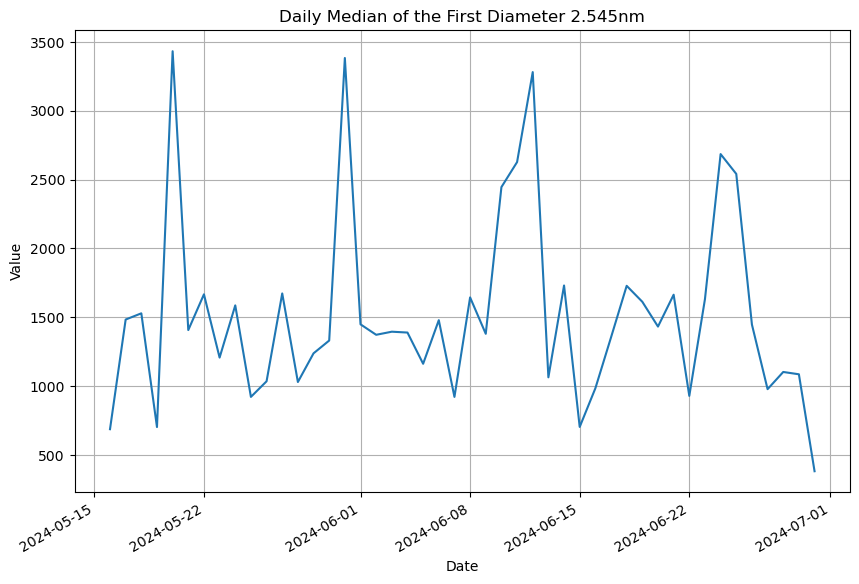

In [54]:
# Example variable to plot (e.g., first diameter value 2.545nm)
daily_median_first_diameter = daily_median.isel(diameter=0)

plt.figure(figsize=(10, 6))
daily_median_first_diameter.plot()
plt.title('Daily Median of the First Diameter 2.545nm')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()

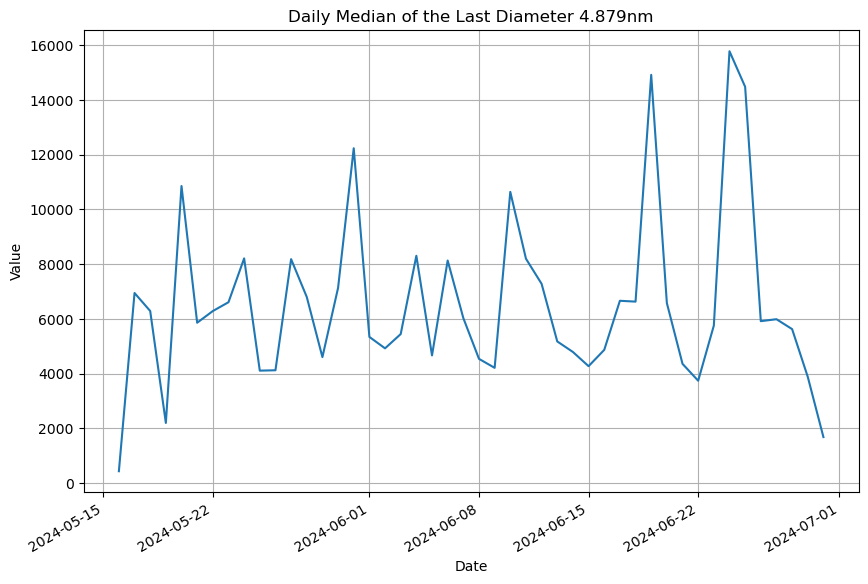

In [55]:
# Example variable to plot (e.g., last diameter value 4.879nm)
daily_median_last_diameter = daily_median.isel(diameter=9)

plt.figure(figsize=(10, 6))
daily_median_last_diameter.plot()
plt.title('Daily Median of the Last Diameter 4.879nm')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()

In [56]:
# Step 5: Find the active peak daytime number concentration (N_A;2.5−5 ) for each day (based on the max value of N2.5−5 in the so-called active region)
# using rolling median data, get the max for each day
# Resample the data to daily frequency and calculate the max for each day
daily_max = rolling_median.resample(time='1D').max()

print(daily_max)

<xarray.DataArray 'neg_particles' (time: 46, diameter: 10)>
array([[107347.76161851, 102393.3837698 ,  98619.33117791,
         96660.98623261,  94520.43409171,  93137.04040408,
         93951.06388315,  94907.01970263,  91632.74324191,
         86099.85254766],
       [  2617.68795076,   3527.89778151,   4386.94569117,
          5291.7554388 ,   7422.21587326,   9941.12680775,
         11309.85842509,  12386.17717753,  14043.2435835 ,
         15766.25047702],
       [ 31628.67736228,  35780.38047848,  44314.4599852 ,
         52439.98865561,  57529.53880448,  59374.03026575,
         55778.25739885,  47566.2433213 ,  49683.70591689,
         48855.49620795],
       [  1659.60346548,   1624.49811721,   1971.51161391,
          2253.41938742,   2941.45222052,   3548.90070021,
          4115.12434605,   4866.4900328 ,   5572.0266704 ,
          6149.10488368],
       [  8748.64515359,  11922.7565337 ,  14318.8203885 ,
         15000.33179039,  14632.53465758,  13752.35623169,
         1

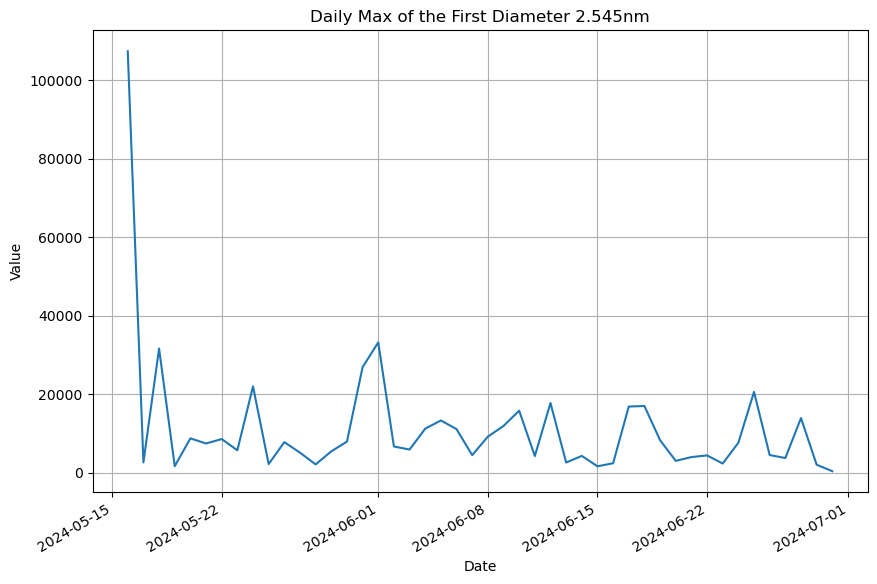

In [57]:
# Example variable to plot (e.g., first diameter value 2.545nm)
daily_max_first_diameter = daily_max.isel(diameter=0)

plt.figure(figsize=(10, 6))
daily_max_first_diameter.plot()
plt.title('Daily Max of the First Diameter 2.545nm')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()

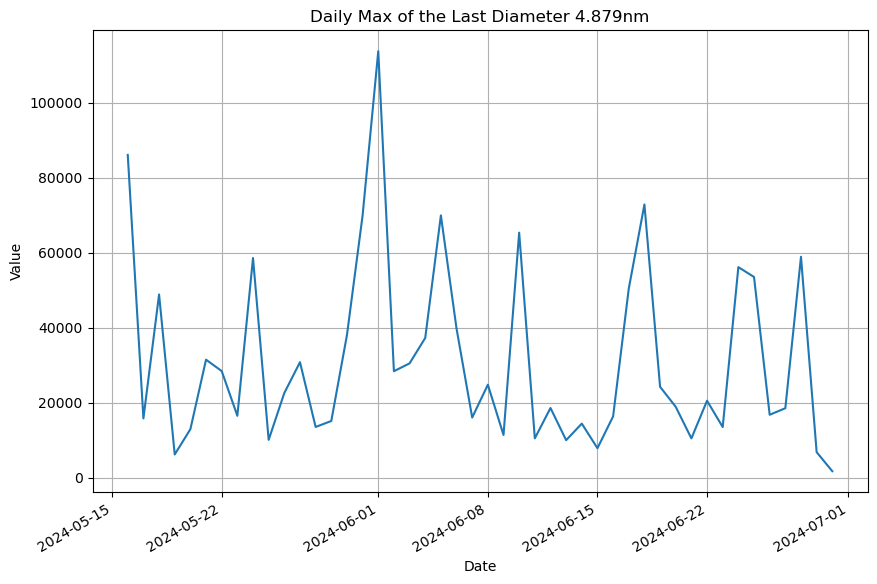

In [58]:
# Example variable to plot (e.g., last diameter value 4.879nm)
daily_max_last_diameter = daily_max.isel(diameter=9)

plt.figure(figsize=(10, 6))
daily_max_last_diameter.plot()
plt.title('Daily Max of the Last Diameter 4.879nm')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()

In [59]:
# Step 6: Determine the change in number concentration ($\Delta$ N2.5−5 ) for each day (step 5 - step 4).
#Change for each day
num_conc_change = daily_max - daily_median

print(num_conc_change)

<xarray.DataArray 'neg_particles' (time: 46, diameter: 10)>
array([[106660.84195106, 101788.47206459,  98010.63502065,
         95995.5976787 ,  93837.71944845,  92501.27276971,
         93383.88793143,  94425.40913419,  91163.89227488,
         85666.81979123],
       [  1134.27015296,   1602.85332675,   1754.07059554,
          1924.90424241,   3663.61362246,   5621.98335447,
          6307.18066031,   6417.82297458,   7382.68882163,
          8819.13363077],
       [ 30100.17069403,  33956.45511438,  41847.5641309 ,
         49562.52085438,  54024.13539716,  55280.30649477,
         50914.63361623,  42224.90724427,  43920.40193137,
         42566.10567608],
       [   957.11573205,    844.11783889,   1222.31957206,
          1410.31808332,   1724.87671092,   2138.13383239,
          2379.09876919,   2850.19415994,   3339.56049279,
          3951.10469891],
       [  5316.39638785,   7554.63146933,   9051.6047585 ,
          8282.67258426,   6691.15211415,   4935.67833987,
          

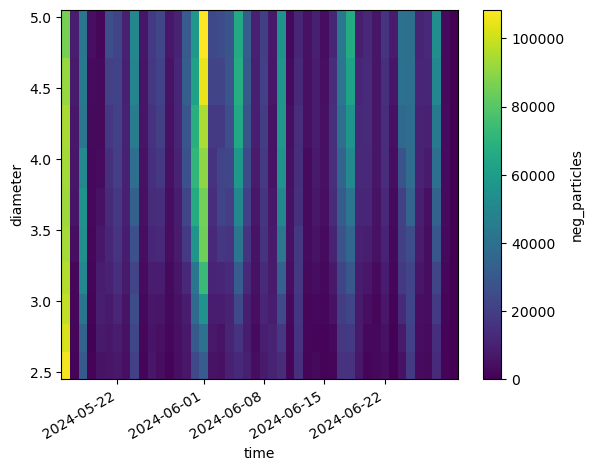

In [108]:
num_conc_change.T.plot()

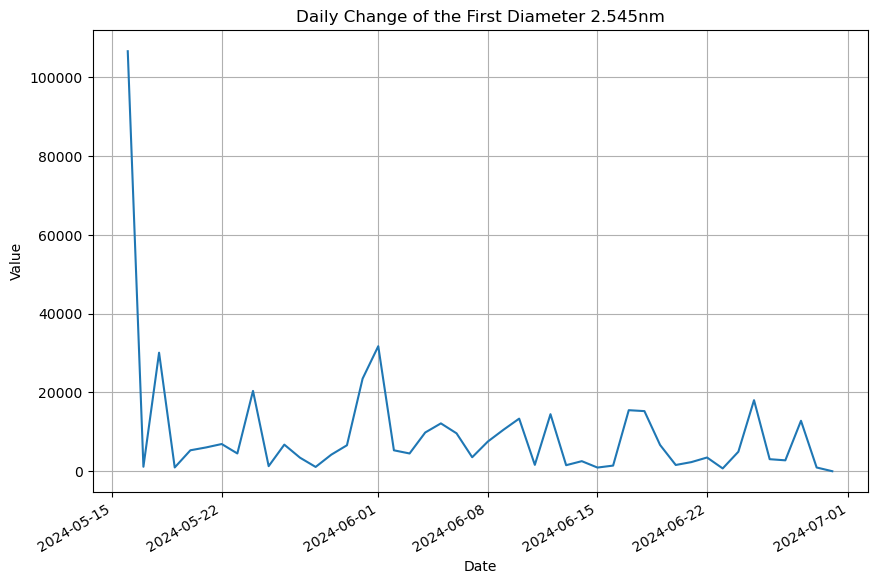

In [60]:
# Example variable to plot (e.g., first diameter value 2.545nm)
daily_change_first_diameter = num_conc_change.isel(diameter=0)

plt.figure(figsize=(10, 6))
daily_change_first_diameter.plot()
plt.title('Daily Change of the First Diameter 2.545nm')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()

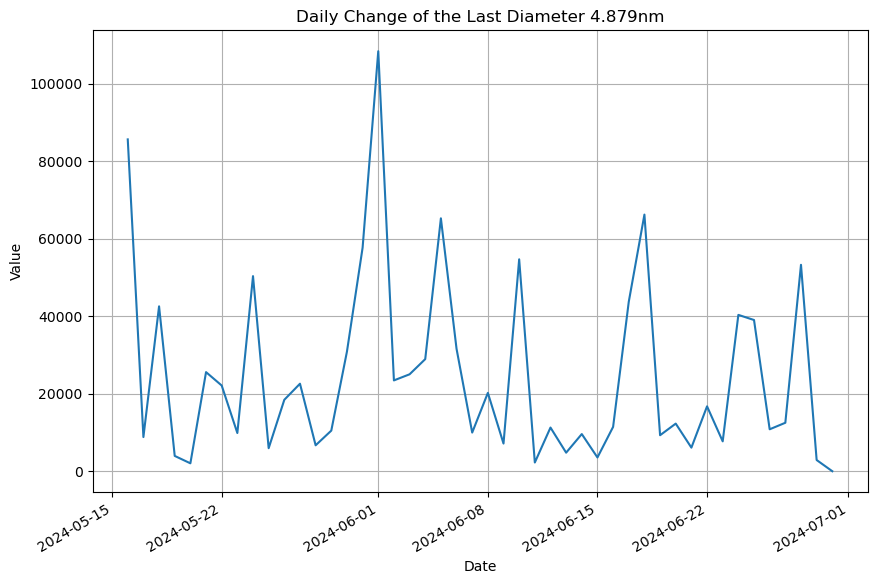

In [61]:
# Example variable to plot (e.g., last diameter value 4.879nm)
daily_change_last_diameter = num_conc_change.isel(diameter=9)

plt.figure(figsize=(10, 6))
daily_change_last_diameter.plot()
plt.title('Daily Change of the Last Diameter 4.879nm')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()

In [62]:
# Step 7: Rank and group the days.
# Calculate percentiles for daily_diff
percentiles = num_conc_change.rank(dim='time', pct=True)


In [63]:
percentiles

<xarray.DataArray 'neg_particles' (time: 46, diameter: 10)>
array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 0.97826087, 0.97826087, 0.97826087],
       [0.15217391, 0.13043478, 0.10869565, 0.08695652, 0.19565217,
        0.2826087 , 0.2826087 , 0.2826087 , 0.2826087 , 0.2826087 ],
       [0.95652174, 0.95652174, 0.95652174, 0.95652174, 0.93478261,
        0.93478261, 0.89130435, 0.82608696, 0.82608696, 0.80434783],
       [0.10869565, 0.06521739, 0.06521739, 0.04347826, 0.04347826,
        0.04347826, 0.04347826, 0.06521739, 0.10869565, 0.13043478],
       [0.54347826, 0.63043478, 0.63043478, 0.47826087, 0.32608696,
        0.23913043, 0.10869565, 0.04347826, 0.06521739, 0.04347826],
       [0.56521739, 0.52173913, 0.5       , 0.56521739, 0.52173913,
        0.5       , 0.56521739, 0.56521739, 0.58695652, 0.67391304],
       [0.65217391, 0.67391304, 0.69565217, 0.7173913 , 0.65217391,
        0.65217391, 0.65217391, 0.67391304, 0.60869565, 0.58695652],
       [0.47826087, 0.45652174, 0.41304348, 0.41304348, 0.41304348,
        0.41304348, 0.36956522, 0.36956522, 0.34782609, 0.34782609],
       [0.91304348, 0.91304348, 0.91304348, 0.80434783, 0.80434783,
        0.80434783, 0.84782609, 0.86956522, 0.84782609, 0.84782609],
       [0.17391304, 0.17391304, 0.23913043, 0.19565217, 0.2173913 ,
        0.17391304, 0.2173913 , 0.23913043, 0.19565217, 0.17391304],
...
       [0.2826087 , 0.2826087 , 0.15217391, 0.2173913 , 0.23913043,
        0.26086957, 0.26086957, 0.26086957, 0.23913043, 0.19565217],
       [0.39130435, 0.43478261, 0.45652174, 0.5       , 0.47826087,
        0.47826087, 0.47826087, 0.47826087, 0.52173913, 0.52173913],
       [0.04347826, 0.04347826, 0.04347826, 0.06521739, 0.06521739,
        0.06521739, 0.13043478, 0.15217391, 0.2173913 , 0.26086957],
       [0.5       , 0.60869565, 0.73913043, 0.76086957, 0.76086957,
        0.7173913 , 0.76086957, 0.76086957, 0.7826087 , 0.7826087 ],
       [0.89130435, 0.89130435, 0.82608696, 0.7826087 , 0.7826087 ,
        0.84782609, 0.80434783, 0.7826087 , 0.76086957, 0.76086957],
       [0.34782609, 0.36956522, 0.30434783, 0.34782609, 0.39130435,
        0.39130435, 0.41304348, 0.39130435, 0.36956522, 0.41304348],
       [0.32608696, 0.32608696, 0.2826087 , 0.23913043, 0.17391304,
        0.19565217, 0.32608696, 0.34782609, 0.43478261, 0.5       ],
       [0.7826087 , 0.76086957, 0.7826087 , 0.84782609, 0.84782609,
        0.82608696, 0.82608696, 0.84782609, 0.86956522, 0.86956522],
       [0.08695652, 0.10869565, 0.08695652, 0.10869565, 0.08695652,
        0.08695652, 0.08695652, 0.08695652, 0.04347826, 0.08695652],
       [0.02173913, 0.02173913, 0.02173913, 0.02173913, 0.02173913,
        0.02173913, 0.02173913, 0.02173913, 0.02173913, 0.02173913]])
Coordinates:
  * diameter  (diameter) float64 2.545 2.736 2.941 3.16 ... 4.224 4.538 4.879
  * time      (time) datetime64[ns] 2024-05-16 2024-05-17 ... 2024-06-30

In [64]:
# Group days based on 5% intervals
percentile_groups = (percentiles * 20).astype(int)  # Converts percentiles to groups (0 to 19)

# Assess potential NPF pattern for each 5% interval group
grouped_patterns = {}

for i in range(20):
    group = num_conc_change.where(percentile_groups == i, drop=True)
    grouped_patterns[f'Group {i*5}-{(i+1)*5}%'] = group


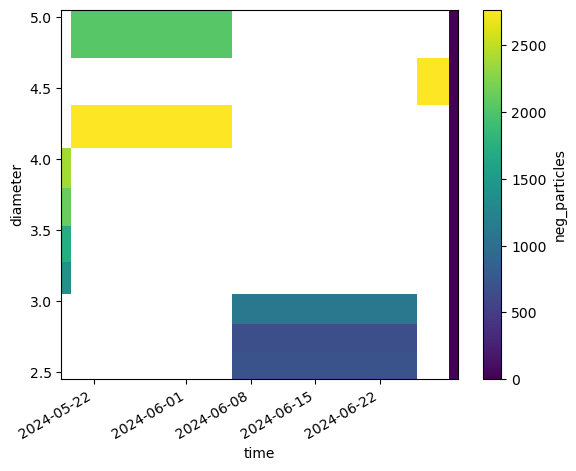

In [65]:
# the days in the first percentile group (0-5%)
grouped_patterns['Group 0-5%'].dropna(dim='time',how='all').T.plot()

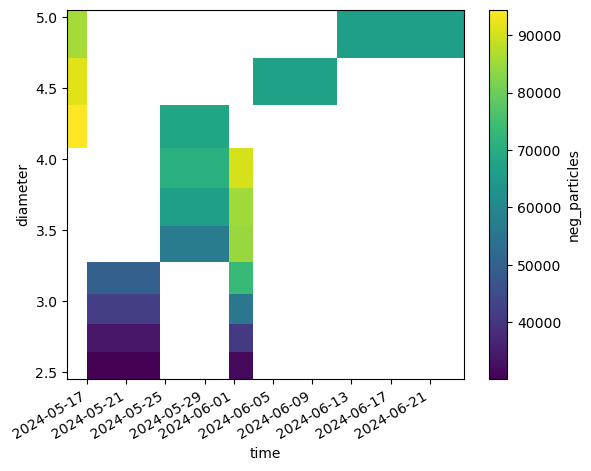

In [66]:
# the days in the last percentile group (95-100%)
grouped_patterns['Group 95-100%'].dropna(dim='time',how='all').T.plot()

In [67]:
# Example: the days in the first percentile group (0-5%) for the first and last diameter values
grouped_patterns['Group 0-5%'].isel(diameter=0)  #23.06.2024 --> 707.82


<xarray.DataArray 'neg_particles' (time: 5)>
array([         nan,          nan, 707.82383985,          nan,
         0.        ])
Coordinates:
    diameter  float64 2.545
  * time      (time) datetime64[ns] 2024-05-19 2024-05-20 ... 2024-06-30

In [68]:
grouped_patterns['Group 95-100%'].isel(diameter=9) #16-05-2024 --> 85666.82 and 18.06.2024 --> 66249.65

<xarray.DataArray 'neg_particles' (time: 6)>
array([85666.81979123,            nan,            nan,            nan,
                  nan, 66249.65367986])
Coordinates:
    diameter  float64 4.879
  * time      (time) datetime64[ns] 2024-05-16 2024-05-18 ... 2024-06-18

## NPF mode fitting
### Step 1
The log ($\Delta N_{2.5-5}$) distribution is depicted, and a visual assessment is made to determine the number of Gaussian curves needed to describe the distribution – in our case, $n$ curves

In [69]:
num_conc_change

<xarray.DataArray 'neg_particles' (time: 46, diameter: 10)>
array([[106660.84195106, 101788.47206459,  98010.63502065,
         95995.5976787 ,  93837.71944845,  92501.27276971,
         93383.88793143,  94425.40913419,  91163.89227488,
         85666.81979123],
       [  1134.27015296,   1602.85332675,   1754.07059554,
          1924.90424241,   3663.61362246,   5621.98335447,
          6307.18066031,   6417.82297458,   7382.68882163,
          8819.13363077],
       [ 30100.17069403,  33956.45511438,  41847.5641309 ,
         49562.52085438,  54024.13539716,  55280.30649477,
         50914.63361623,  42224.90724427,  43920.40193137,
         42566.10567608],
       [   957.11573205,    844.11783889,   1222.31957206,
          1410.31808332,   1724.87671092,   2138.13383239,
          2379.09876919,   2850.19415994,   3339.56049279,
          3951.10469891],
       [  5316.39638785,   7554.63146933,   9051.6047585 ,
          8282.67258426,   6691.15211415,   4935.67833987,
          3371.90559912,   2766.9556767 ,   2870.61176388,
          2040.43329432],
...
       [  3055.41701919,   3653.63125077,   3834.0880686 ,
          6269.53267274,   7921.01222156,   9057.10575491,
         10461.25118874,  10404.40153667,  11210.39634392,
         10825.29168029],
       [  2766.96487825,   3299.03950012,   3415.69901331,
          3391.67682042,   3598.89055   ,   4517.45583202,
          7693.84253092,   9784.45915116,  11485.91695335,
         12510.74106837],
       [ 12811.66223628,  14186.02320813,  17898.7780587 ,
         22408.50209503,  29074.3513676 ,  34170.67024262,
         38748.48565609,  43696.28393476,  49582.45409551,
         53288.4306271 ],
       [   946.15557882,   1032.61217236,   1557.44937296,
          2097.05436455,   2869.28701066,   3075.81680109,
          3300.24738133,   3273.50094994,   2767.96526132,
          2891.63597835],
       [     0.        ,      0.        ,      0.        ,
             0.        ,      0.        ,      0.        ,
             0.        ,      0.        ,      0.        ,
             0.        ]])
Coordinates:
  * diameter  (diameter) float64 2.545 2.736 2.941 3.16 ... 4.224 4.538 4.879
  * time      (time) datetime64[ns] 2024-05-16 2024-05-17 ... 2024-06-30

In [70]:
log_dist = np.log(num_conc_change)

/home/coliewo/anaconda3/lib/python3.11/site-packages/xarray/core/computation.py:761: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


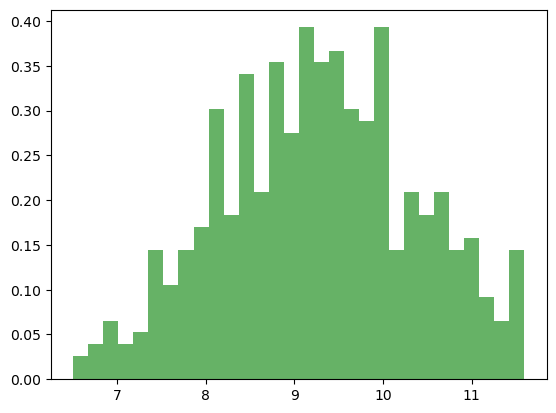

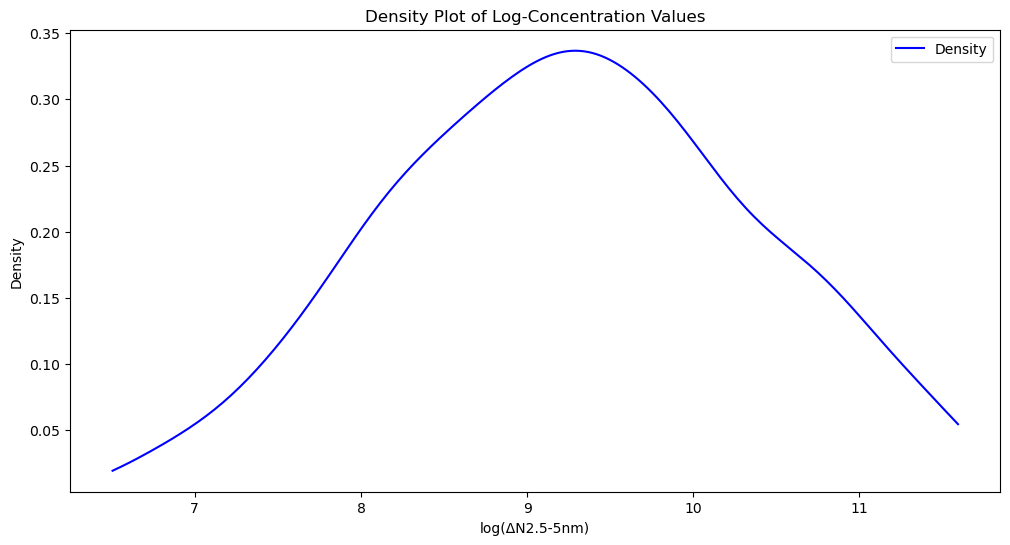

In [71]:
from scipy.stats import gaussian_kde

# Flatten the DataFrame to a 1D array
log_concentrations = log_dist.values.flatten()

# Remove NaN and infinite values from the flattened array
cleaned_log_concentrations = log_concentrations[np.isfinite(log_concentrations)]

plt.hist(cleaned_log_concentrations, bins=30, density=True, alpha=0.6, color='g')

# Create the density plot
plt.figure(figsize=(12, 6))
density = gaussian_kde(cleaned_log_concentrations)
xs = np.linspace(min(cleaned_log_concentrations), max(cleaned_log_concentrations), 200)
density_values = density(xs)

plt.plot(xs, density_values, label='Density', color='blue')
plt.xlabel('log(ΔN2.5-5nm)')
plt.ylabel('Density')
plt.title('Density Plot of Log-Concentration Values')
plt.legend()

# Show the plot
plt.show()


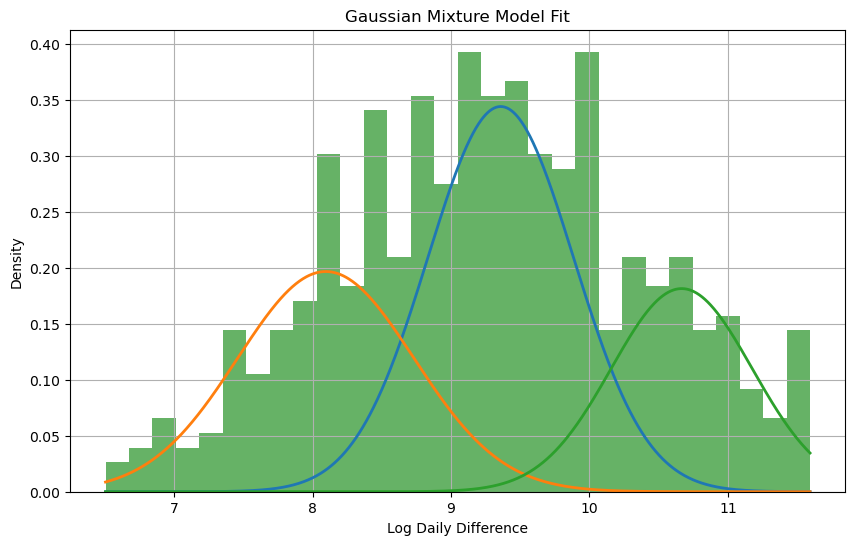

In [72]:
from scipy.stats import norm
from sklearn.mixture import GaussianMixture

cleaned_values = cleaned_log_concentrations.reshape(-1, 1)

# Fit a Gaussian Mixture Model with 3 components
gmm = GaussianMixture(n_components=3)
gmm.fit(cleaned_values)

# Get the means and covariances of the fitted Gaussians
means = gmm.means_.flatten()
covariances = gmm.covariances_.flatten()
weights = gmm.weights_

# Plot the histogram and the fitted Gaussians
plt.figure(figsize=(10, 6))
plt.hist(cleaned_values, bins=30, density=True, alpha=0.6, color='g')

# Plot each Gaussian component
x = np.linspace(cleaned_values.min(), cleaned_values.max(), 1000)
for mean, covar, weight in zip(means, covariances, weights):
    plt.plot(x, weight * norm.pdf(x, mean, np.sqrt(covar)), linewidth=2)

plt.title('Gaussian Mixture Model Fit')
plt.xlabel('Log Daily Difference')
plt.ylabel('Density')
plt.grid(True)
plt.show()


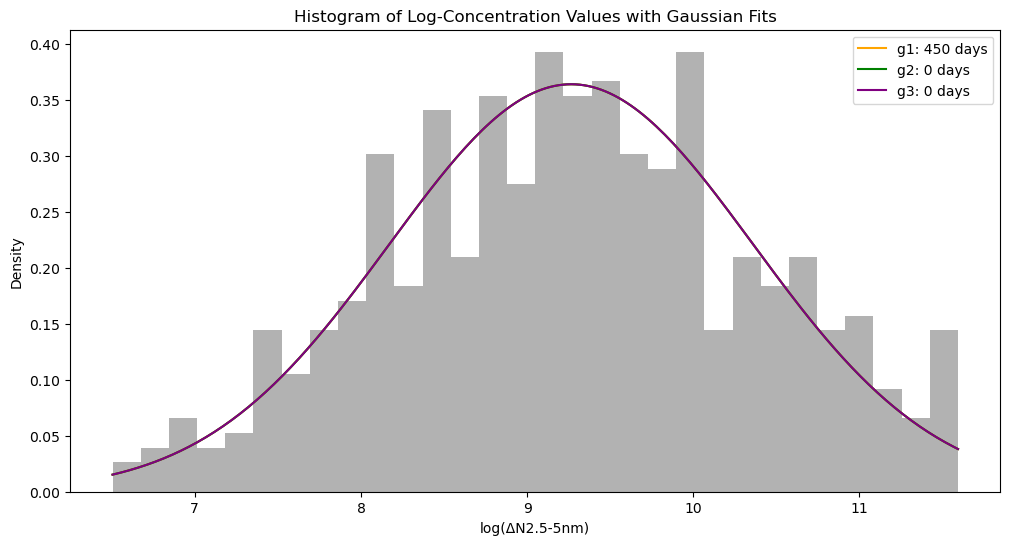

Number of data points in g1: 450
Number of data points in g2: 0
Number of data points in g3: 0


In [73]:
# Fit Gaussian distributions to the data
params1 = norm.fit(cleaned_values)
params2 = norm.fit(cleaned_values)
params3 = norm.fit(cleaned_values)

# Assign each data point to the closest Gaussian mode
def closest_gaussian(log_value, params_list):
    pdf_values = [norm.pdf(log_value, *params) for params in params_list]
    return np.argmax(pdf_values)

# Assign each data point to a Gaussian mode
gaussian_modes = [params1, params2, params3]
mode_assignments = [closest_gaussian(x, gaussian_modes) for x in cleaned_values]

# Count frequencies for each mode
unique, counts = np.unique(mode_assignments, return_counts=True)
mode_frequencies = dict(zip(unique, counts))

# Plot the histogram and Gaussian fits
plt.figure(figsize=(12, 6))
plt.hist(cleaned_values, bins=30, density=True, alpha=0.6, color='gray')

# Plot the Gaussian fits
xs = np.linspace(min(cleaned_values), max(cleaned_values), 200)
pdf1 = norm.pdf(xs, *params1)
pdf2 = norm.pdf(xs, *params2)
pdf3 = norm.pdf(xs, *params3)

plt.plot(xs, pdf1, label=f'g1: {mode_frequencies.get(0, 0)} days', color='orange')
plt.plot(xs, pdf2, label=f'g2: {mode_frequencies.get(1, 0)} days', color='green')
plt.plot(xs, pdf3, label=f'g3: {mode_frequencies.get(2, 0)} days', color='purple')

plt.xlabel('log(ΔN2.5-5nm)')
plt.ylabel('Density')
plt.title('Histogram of Log-Concentration Values with Gaussian Fits')
plt.legend()

# Show the plot
plt.show()

# Print the number of data points assigned to each Gaussian mode
print(f'Number of data points in g1: {mode_frequencies.get(0, 0)}')
print(f'Number of data points in g2: {mode_frequencies.get(1, 0)}')
print(f'Number of data points in g3: {mode_frequencies.get(2, 0)}')


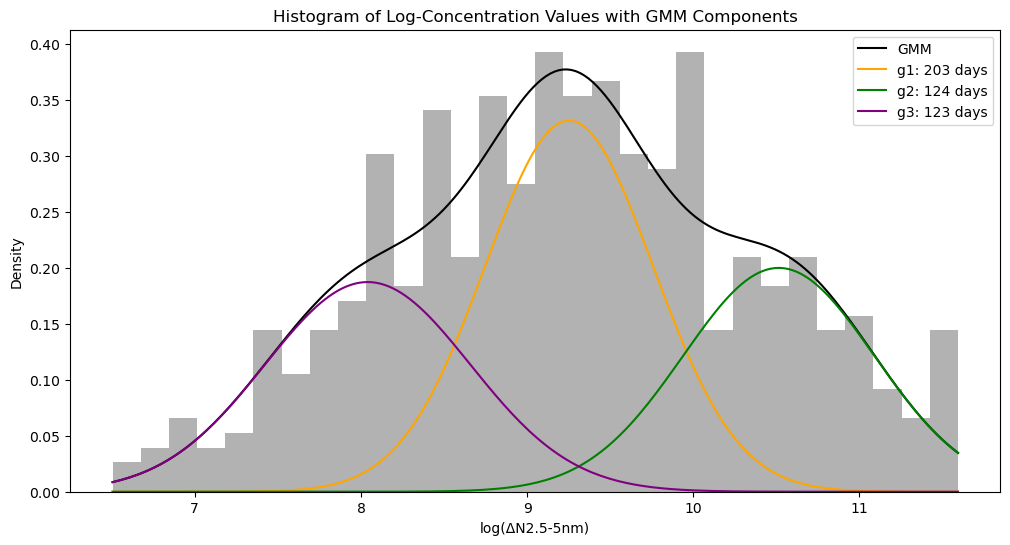

Number of data points in g1: 203
Number of data points in g2: 124
Number of data points in g3: 123


In [74]:
# Fit Gaussian distributions to the data

# Fit a Gaussian Mixture Model with 3 components
gmm = GaussianMixture(n_components=3, random_state=0)
gmm.fit(cleaned_values)

# Predict the component for each data point
gmm_labels = gmm.predict(cleaned_values)

# Count the number of data points in each component
unique, counts = np.unique(gmm_labels, return_counts=True)
component_frequencies = dict(zip(unique, counts))

# Plot the histogram and Gaussian Mixture Model fits
plt.figure(figsize=(12, 6))
plt.hist(cleaned_values, bins=30, density=True, alpha=0.6, color='gray')

# Plot the GMM components
xs = np.linspace(min(cleaned_values), max(cleaned_values), 200).reshape(-1, 1)
logprob = gmm.score_samples(xs)
responsibilities = gmm.predict_proba(xs)
pdf = np.exp(logprob)
pdf_individual = responsibilities * pdf[:, np.newaxis]

plt.plot(xs, pdf, label='GMM', color='black')
colors = ['orange', 'green', 'purple']
for i in range(3):
    plt.plot(xs, pdf_individual[:, i], label=f'g{i+1}: {component_frequencies.get(i, 0)} days', color=colors[i])

plt.xlabel('log(ΔN2.5-5nm)')
plt.ylabel('Density')
plt.title('Histogram of Log-Concentration Values with GMM Components')
plt.legend()

# Show the plot
plt.show()

# Print the number of data points assigned to each GMM component
print(f'Number of data points in g1: {component_frequencies.get(0, 0)}')
print(f'Number of data points in g2: {component_frequencies.get(1, 0)}')
print(f'Number of data points in g3: {component_frequencies.get(2, 0)}')


In [75]:
# Store the values in separate arrays based on their assigned components
component_1_values = cleaned_log_concentrations[gmm_labels == 0]
component_2_values = cleaned_log_concentrations[gmm_labels == 1]
component_3_values = cleaned_log_concentrations[gmm_labels == 2]

# Optionally, return the component values as arrays for further analysis
component_1_values, component_2_values, component_3_values

(array([8.63443979, 8.74944405, 8.76683424, 8.90689319, 9.08467892,
        8.57855098, 8.92991609, 9.11069734, 9.02192097, 8.80854135,
        8.7061146 , 8.80317424, 8.89693838, 9.18897128, 9.35363325,
        9.47865032, 9.63007783, 9.75821366, 8.84011738, 9.0574464 ,
        9.31868351, 9.54574423, 9.7094789 , 9.78183755, 9.8898115 ,
        9.92489859, 8.66756225, 8.89284697, 9.08360382, 9.1701003 ,
        9.22322941, 9.20883014, 9.17694054, 9.1962412 , 9.92322334,
        8.62356909, 8.68762952, 8.68992649, 8.81764658, 8.6547543 ,
        8.78358192, 9.07989423, 9.35468069, 9.500336  , 9.60114218,
        9.64177362, 9.74039772, 9.82246662, 8.68823573, 9.06740189,
        9.39003826, 9.56475395, 9.76646926, 9.91540035, 8.61253855,
        8.80880884, 8.72771331, 8.94240316, 9.06464781, 9.2281534 ,
        9.33809529, 9.32730688, 9.25761087, 8.79368886, 8.85253758,
        9.05965546, 9.44687739, 9.80072691, 8.57748813, 8.82425371,
        9.08822335, 9.26850749, 9.43340965, 9.51

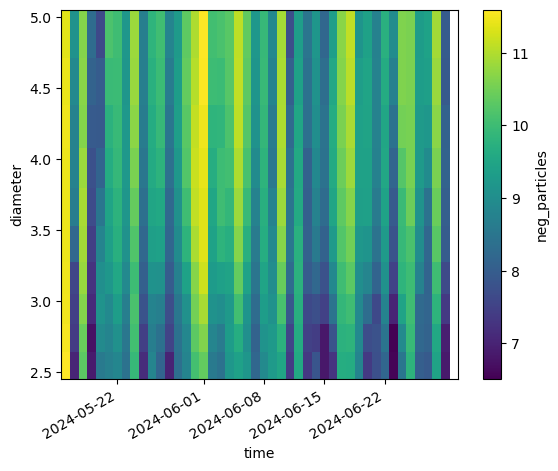

In [76]:
log_dist.T.plot()

#### The intensity of NPF events is assessed within each group by plotting the diurnal median particle number size distribution so that both visual and statistical inspections of the diurnal variation of N2.5−5 can be performed for each group.

In [77]:
# we need to divide the N2.5-5 data into the 3 Gaussian curves
# the data is
ds_2p5_5nm.dropna(dim='time')


<xarray.DataArray 'neg_particles' (time: 1006, diameter: 10)>
array([[     0.      ,      0.      ,      0.      , ..., -12501.354266,
        -12938.894476, -12066.822736],
       [   793.892923,    754.034221,    796.312492, ...,    251.292195,
           339.285557,    376.718538],
       [   246.057416,    344.544083,    461.096684, ...,    342.721602,
           338.92016 ,    341.944488],
       ...,
       [   627.608706,    658.406955,   1047.195848, ...,   3695.756149,
          4314.862024,   4575.879331],
       [   252.848542,    494.867587,    404.279244, ...,   1220.205738,
          1611.609949,   1944.126849],
       [   510.434755,    471.272613,    484.89185 , ...,    916.23926 ,
          1141.077917,   1418.255486]])
Coordinates:
  * diameter  (diameter) float64 2.545 2.736 2.941 3.16 ... 4.224 4.538 4.879
  * time      (time) datetime64[ns] 2024-05-16T07:00:00 ... 2024-06-30
Attributes:
    units:        cm-3
    description:  Negative particle number-size distribution (dN/dlogDp)

In [78]:
gmm_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 2, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2,

In [79]:
new = gmm_labels.reshape(45,10)
new

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [0, 0, 0, 0, 0, 2, 2, 2, 2, 2],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
       [2, 2, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2, 2, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [2, 2, 0, 0, 0, 0, 0, 0, 1, 1],
       [2, 2, 2, 2, 2, 2, 2, 2, 0, 0],
       [2, 2, 2, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
       [2, 0, 0, 0, 0, 1, 1, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
       [2, 2, 2, 2, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 2, 0, 0, 0],
       [0, 0, 1, 1, 1, 1,

In [81]:
log_dist2 = log_dist[:-1]
log_dist2

In [82]:
times = log_dist2.time
diameters = log_dist2.diameter

# Create the DataArray
data_array = xr.DataArray(new, coords=[times, diameters], dims=['time', 'diameter'])
data_array

<xarray.DataArray (time: 45, diameter: 10)>
array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [0, 0, 0, 0, 0, 2, 2, 2, 2, 2],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
       [2, 2, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2, 2, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [2, 2, 0, 0, 0, 0, 0, 0, 1, 1],
       [2, 2, 2, 2, 2, 2, 2, 2, 0, 0],
       [2, 2, 2, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
       [2, 0, 0, 0, 0, 1, 1, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
...
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [2, 2, 2, 2, 0, 0, 0, 0, 0, 0],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [2, 2, 2, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [2, 2, 2, 0, 0, 0, 0, 0, 0, 0],
       [2, 2, 2, 2, 2, 0, 0, 0, 0, 0],
       [2, 2, 0, 0, 0, 0, 0, 0, 0, 0],
       [2, 2, 2, 2, 2, 2, 2, 2, 0, 0],
       [2, 0, 0, 0, 0, 0, 1, 1, 1, 1],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
       [2, 2, 2, 0, 0, 0, 0, 0, 0, 0],
       [2, 2, 2, 2, 2, 2, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]])
Coordinates:
  * time      (time) datetime64[ns] 2024-05-16 2024-05-17 ... 2024-06-29
  * diameter  (diameter) float64 2.545 2.736 2.941 3.16 ... 4.224 4.538 4.879

In [90]:
# Add the components to the original DataArray for easier selection
#component_labels = xr.DataArray(components, coords=[log_daily_diff.time], dims=['time'])
#neg_particles = neg_particles.sel(time=log_daily_diff.time)  # Filter the DataArray to match the time coordinates of log_daily_diff
#neg_particles = neg_particles.assign_coords(component=component_labels)

test = ds_2p5_5nm.sel(time=log_dist2.time) 

In [91]:
# Function to create subsets for each group
def get_group_subset(test, data_array, group_number):
    return test.where(data_array == group_number, drop=True)

# Create subsets for each group
group_0_data = get_group_subset(test, data_array, 0)
group_1_data = get_group_subset(test, data_array, 1)
group_2_data = get_group_subset(test, data_array, 2)

In [92]:
# Extract dates from the random days data (ignoring the time part)
unique_dates0 = pd.to_datetime(group_0_data.time.values).normalize()
unique_dates1 = pd.to_datetime(group_1_data.time.values).normalize()
unique_dates2 = pd.to_datetime(group_2_data.time.values).normalize()

# Create a condition to filter the monthly data for these dates
condition0 = ds_2p5_5nm.time.dt.floor('D').isin(unique_dates0)
condition1 = ds_2p5_5nm.time.dt.floor('D').isin(unique_dates1)
condition2 = ds_2p5_5nm.time.dt.floor('D').isin(unique_dates2)

# Filter the monthly data
updated_group_0_data = ds_2p5_5nm.where(condition0, drop=True)
updated_group_1_data = ds_2p5_5nm.where(condition1, drop=True)
updated_group_2_data = ds_2p5_5nm.where(condition2, drop=True)


In [94]:
updated_group_0_data

<xarray.DataArray 'neg_particles' (time: 864, diameter: 10)>
array([[          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       ...,
       [ 805.53675631,  657.95436777,  600.98712596, ..., 1527.48481505,
        2179.69521441, 2625.14491169],
       [ 815.02601301,  461.69420655,  345.33532657, ..., 2441.74249386,
        2582.01353592, 2790.84640328],
       [ 640.68925098,  592.79646766,  751.78553349, ..., 1849.14850501,
        2110.73198217, 2254.19515406]])
Coordinates:
  * diameter  (diameter) float64 2.545 2.736 2.941 3.16 ... 4.224 4.538 4.879
  * time      (time) datetime64[ns] 2024-05-17 ... 2024-06-28T23:00:00
Attributes:
    units:        cm-3
    description:  Negative particle number-size distribution (dN/dlogDp)

In [95]:
updated_group_1_data

<xarray.DataArray 'neg_particles' (time: 480, diameter: 10)>
array([[          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       ...,
       [ 805.53675631,  657.95436777,  600.98712596, ..., 1527.48481505,
        2179.69521441, 2625.14491169],
       [ 815.02601301,  461.69420655,  345.33532657, ..., 2441.74249386,
        2582.01353592, 2790.84640328],
       [ 640.68925098,  592.79646766,  751.78553349, ..., 1849.14850501,
        2110.73198217, 2254.19515406]])
Coordinates:
  * diameter  (diameter) float64 2.545 2.736 2.941 3.16 ... 4.224 4.538 4.879
  * time      (time) datetime64[ns] 2024-05-16 ... 2024-06-28T23:00:00
Attributes:
    units:        cm-3
    description:  Negative particle number-size distribution (dN/dlogDp)

In [96]:
updated_group_2_data

<xarray.DataArray 'neg_particles' (time: 576, diameter: 10)>
array([[          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       ...,
       [ 366.21444431,  478.30259784,  833.546809  , ..., 3167.51866889,
        4055.03847442, 4329.05179319],
       [ 627.60870566,  658.40695485, 1047.19584822, ..., 3695.75614925,
        4314.86202387, 4575.87933098],
       [ 252.84854165,  494.86758705,  404.27924422, ..., 1220.20573783,
        1611.60994869, 1944.12684929]])
Coordinates:
  * diameter  (diameter) float64 2.545 2.736 2.941 3.16 ... 4.224 4.538 4.879
  * time      (time) datetime64[ns] 2024-05-17 ... 2024-06-29T23:00:00
Attributes:
    units:        cm-3
    description:  Negative particle number-size distribution (dN/dlogDp)

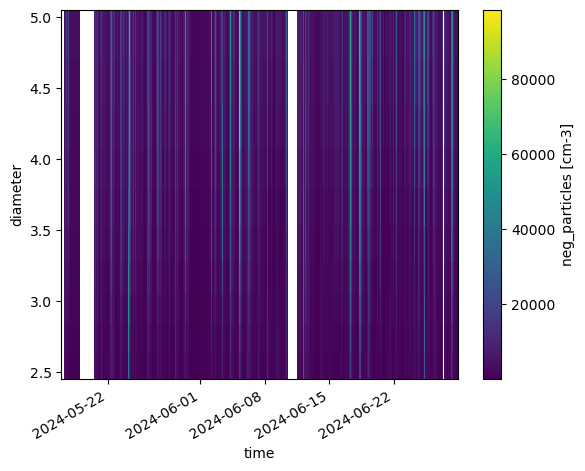

In [98]:
updated_group_0_data.T.plot()

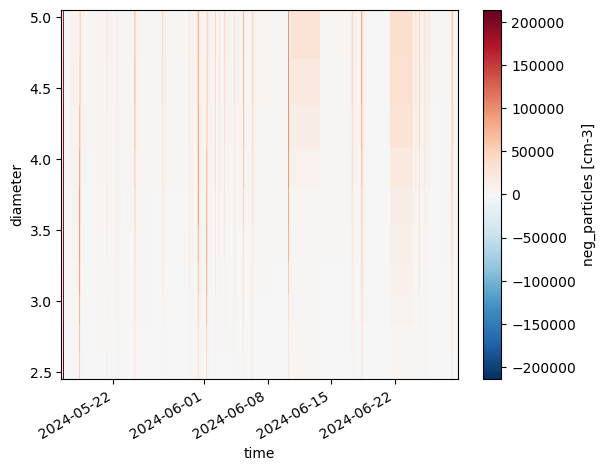

In [99]:
updated_group_1_data.dropna(dim='time').T.plot()

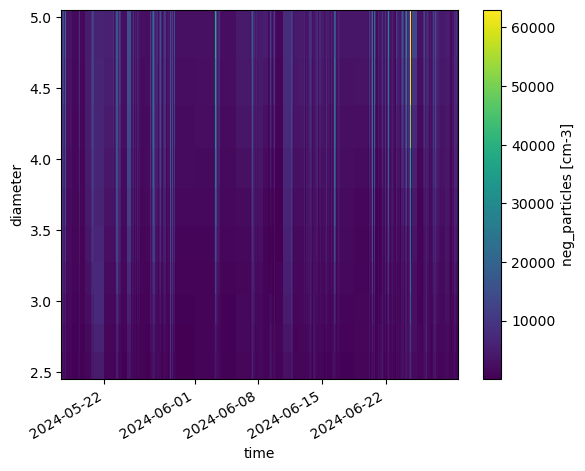

In [100]:
updated_group_2_data.dropna(dim='time').T.plot()

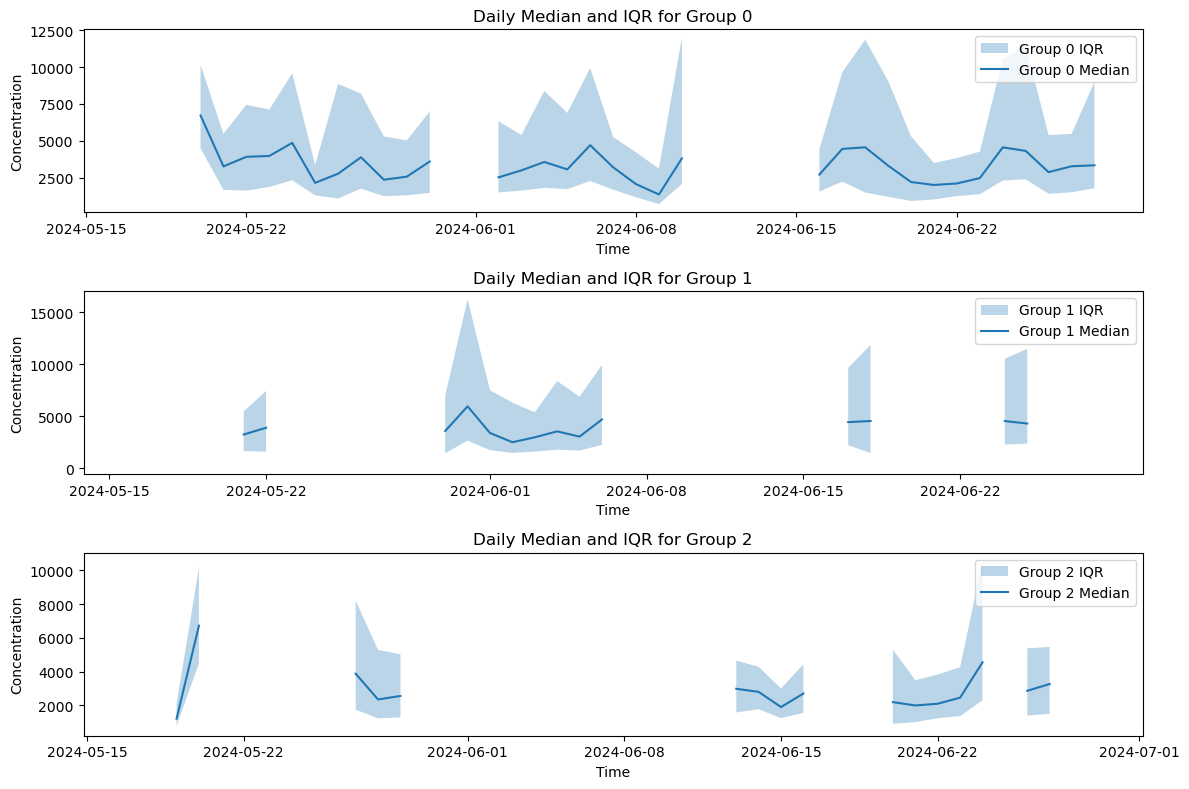

In [101]:
# Function to calculate daily median and IQR
def calculate_daily_statistics(data_array):
    daily_median = data_array.resample(time='1D').median(dim=['time', 'diameter'])
    daily_q25 = data_array.resample(time='1D').quantile(0.25, dim=['time', 'diameter'])
    daily_q75 = data_array.resample(time='1D').quantile(0.75, dim=['time', 'diameter'])
    return daily_median, daily_q25, daily_q75

# Calculate daily statistics for each group
group_0_median, group_0_q25, group_0_q75 = calculate_daily_statistics(updated_group_0_data)
group_1_median, group_1_q25, group_1_q75 = calculate_daily_statistics(updated_group_1_data)
group_2_median, group_2_q25, group_2_q75 = calculate_daily_statistics(updated_group_2_data)

# Plotting function
def plot_daily_statistics(time, median, q25, q75, group_number):
    plt.fill_between(time, q25, q75, alpha=0.3, label=f'Group {group_number} IQR')
    plt.plot(time, median, label=f'Group {group_number} Median')
    plt.xlabel('Time')
    plt.ylabel('Concentration')
    plt.title(f'Daily Median and IQR for Group {group_number}')
    plt.legend()

# Plot the results
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plot_daily_statistics(group_0_median.time, group_0_median, group_0_q25, group_0_q75, 0)

plt.subplot(3, 1, 2)
plot_daily_statistics(group_1_median.time, group_1_median, group_1_q25, group_1_q75, 1)

plt.subplot(3, 1, 3)
plot_daily_statistics(group_2_median.time, group_2_median, group_2_q25, group_2_q75, 2)

plt.tight_layout()
plt.show()


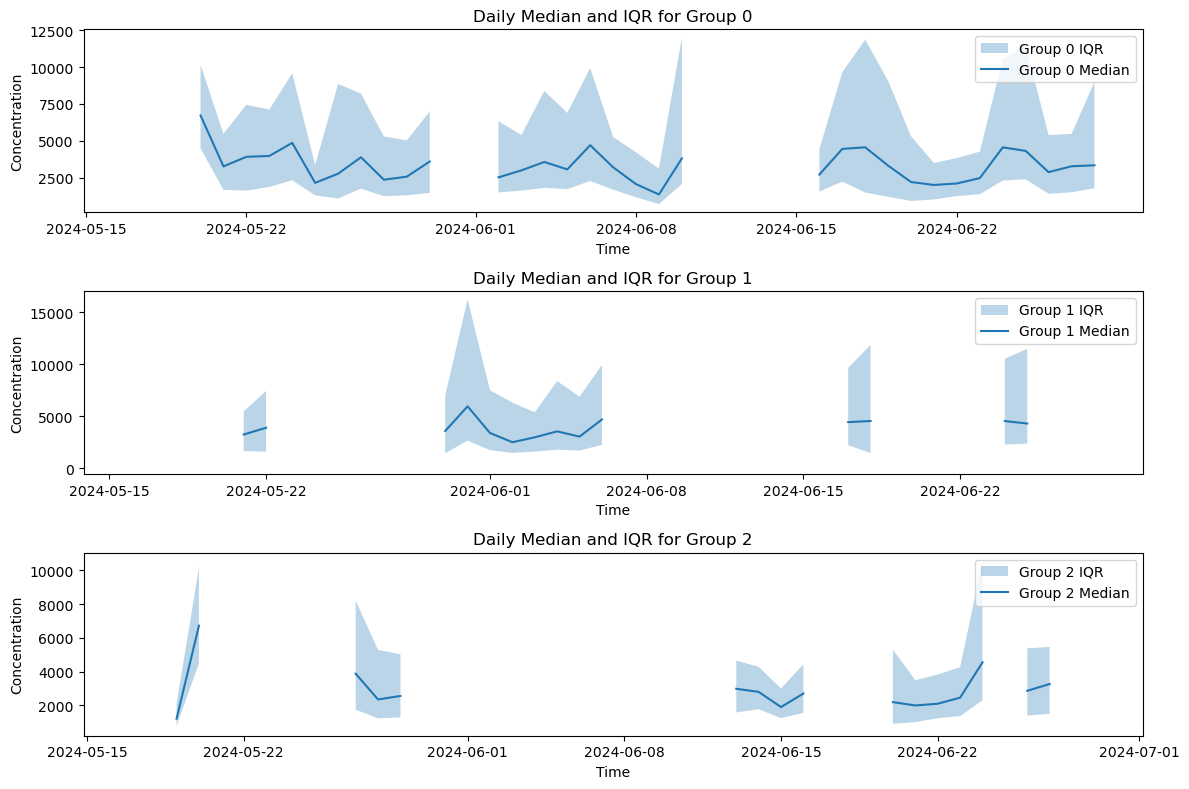

In [102]:
# Function to calculate daily median and IQR
def calculate_daily_statistics(data_array):
    daily_median = data_array.resample(time='1D').median(dim=['time', 'diameter'])
    daily_q25 = data_array.resample(time='1D').quantile(0.25, dim=['time', 'diameter'])
    daily_q75 = data_array.resample(time='1D').quantile(0.75, dim=['time', 'diameter'])
    return daily_median, daily_q25, daily_q75

# Calculate daily statistics for each group
group_0_median, group_0_q25, group_0_q75 = calculate_daily_statistics(updated_group_0_data.dropna(dim='time'))
group_1_median, group_1_q25, group_1_q75 = calculate_daily_statistics(updated_group_1_data.dropna(dim='time'))
group_2_median, group_2_q25, group_2_q75 = calculate_daily_statistics(updated_group_2_data.dropna(dim='time'))

# Plotting function
def plot_daily_statistics(time, median, q25, q75, group_number):
    plt.fill_between(time, q25, q75, alpha=0.3, label=f'Group {group_number} IQR')
    plt.plot(time, median, label=f'Group {group_number} Median')
    plt.xlabel('Time')
    plt.ylabel('Concentration')
    plt.title(f'Daily Median and IQR for Group {group_number}')
    plt.legend()

# Plot the results
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plot_daily_statistics(group_0_median.time, group_0_median, group_0_q25, group_0_q75, 0)

plt.subplot(3, 1, 2)
plot_daily_statistics(group_1_median.time, group_1_median, group_1_q25, group_1_q75, 1)

plt.subplot(3, 1, 3)
plot_daily_statistics(group_2_median.time, group_2_median, group_2_q25, group_2_q75, 2)

plt.tight_layout()
plt.show()


Did I use the wrong data?

In [103]:
#  Calculate diurnal variations
group_0_data_diurnal_variation = updated_group_0_data.groupby(updated_group_0_data.time.dt.hour).mean(dim='time')
group_1_data_diurnal_variation = updated_group_1_data.groupby(updated_group_1_data.time.dt.hour).mean(dim='time')
group_2_data_diurnal_variation = updated_group_2_data.groupby(updated_group_2_data.time.dt.hour).mean(dim='time')

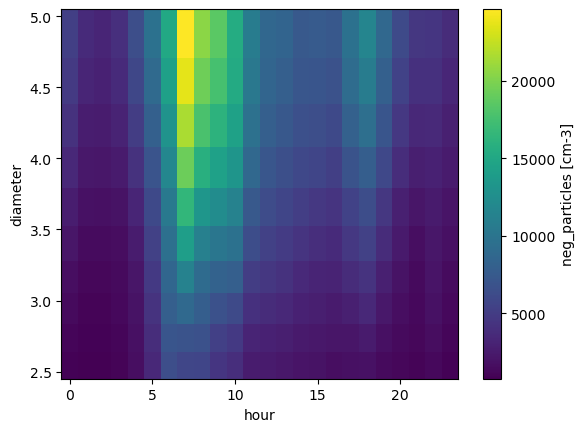

In [104]:
group_0_data_diurnal_variation.T.plot()

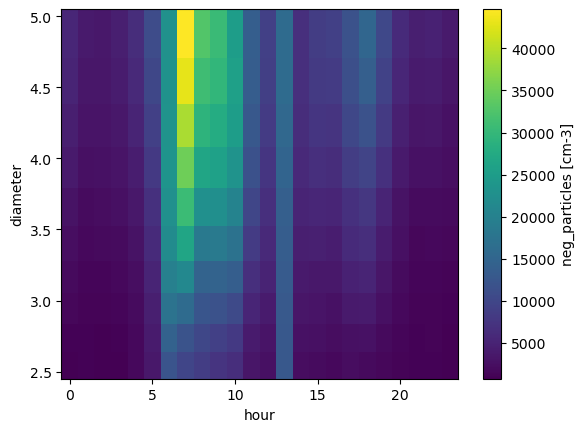

In [105]:
group_1_data_diurnal_variation.T.plot()

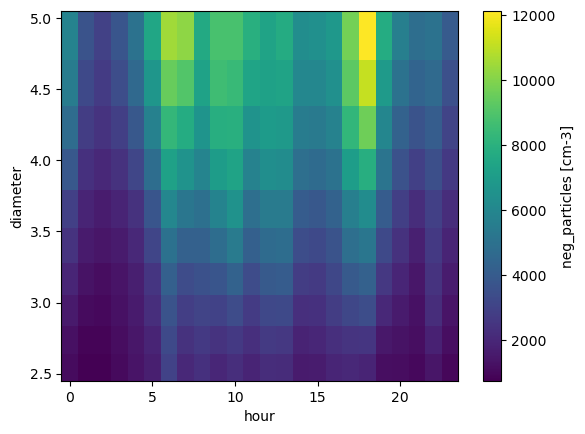

In [106]:
group_2_data_diurnal_variation.T.plot()